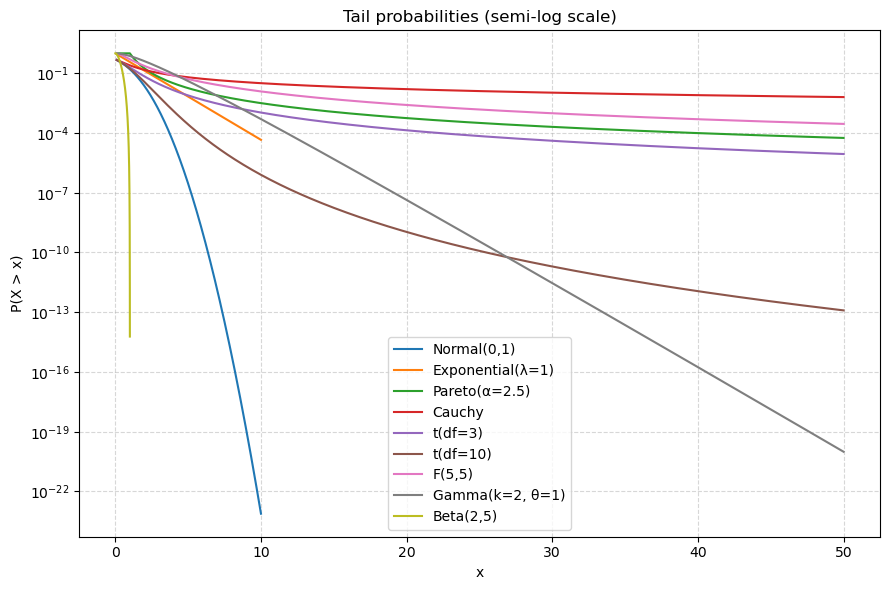

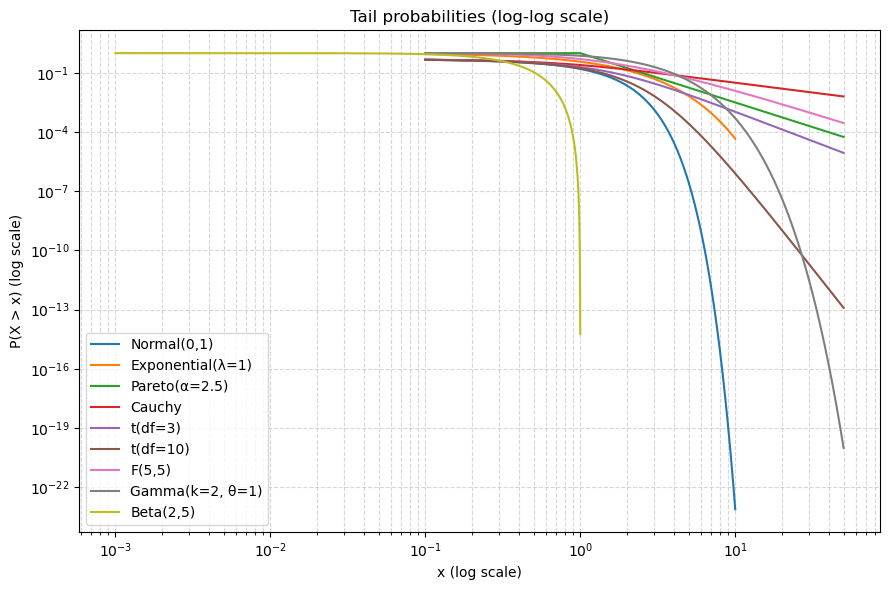

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, pareto, cauchy, t, f, gamma, beta

# ========================
# x 轴设置
# ========================
x = np.linspace(0.1, 10, 500)          # 轻尾 & 中等尾
x_heavy = np.linspace(0.1, 50, 500)    # 重尾
x_beta = np.linspace(0.001, 0.999, 500)  # Beta 专用

# ========================
# 分布定义
# ========================

# 轻尾
dist_normal = norm(loc=0, scale=1)
dist_expon = expon(scale=1)

# 重尾
alpha = 2.5
dist_pareto = pareto(b=alpha)
dist_cauchy = cauchy()
dist_t3 = t(df=3)

# 新增分布
dist_t10 = t(df=10)          # 较轻的 t
dist_f = f(dfn=5, dfd=5)
dist_gamma = gamma(a=2, scale=1)
dist_beta = beta(a=2, b=5)

# ========================
# 尾概率 SF(x)
# ========================

# 轻尾
tail_normal = dist_normal.sf(x)
tail_expon = dist_expon.sf(x)

# 重尾
tail_pareto = dist_pareto.sf(x_heavy)
tail_cauchy = dist_cauchy.sf(x_heavy)
tail_t3 = dist_t3.sf(x_heavy)

# 新增
tail_t10 = dist_t10.sf(x_heavy)
tail_f = dist_f.sf(x_heavy)
tail_gamma = dist_gamma.sf(x_heavy)
tail_beta = dist_beta.sf(x_beta)

# ========================
# 图 1：semi-log
# ========================
plt.figure(figsize=(9, 6))

plt.semilogy(x, tail_normal, label="Normal(0,1)")
plt.semilogy(x, tail_expon, label="Exponential(λ=1)")

plt.semilogy(x_heavy, tail_pareto, label="Pareto(α=2.5)")
plt.semilogy(x_heavy, tail_cauchy, label="Cauchy")
plt.semilogy(x_heavy, tail_t3, label="t(df=3)")
plt.semilogy(x_heavy, tail_t10, label="t(df=10)")
plt.semilogy(x_heavy, tail_f, label="F(5,5)")
plt.semilogy(x_heavy, tail_gamma, label="Gamma(k=2, θ=1)")

plt.semilogy(x_beta, tail_beta, label="Beta(2,5)")

plt.xlabel("x")
plt.ylabel("P(X > x)")
plt.title("Tail probabilities (semi-log scale)")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

# ========================
# 图 2：log-log
# ========================
def positive_part(xs, ys):
    mask = ys > 0
    return xs[mask], ys[mask]

plt.figure(figsize=(9, 6))

plt.loglog(*positive_part(x, tail_normal), label="Normal(0,1)")
plt.loglog(*positive_part(x, tail_expon), label="Exponential(λ=1)")

plt.loglog(*positive_part(x_heavy, tail_pareto), label="Pareto(α=2.5)")
plt.loglog(*positive_part(x_heavy, tail_cauchy), label="Cauchy")
plt.loglog(*positive_part(x_heavy, tail_t3), label="t(df=3)")
plt.loglog(*positive_part(x_heavy, tail_t10), label="t(df=10)")
plt.loglog(*positive_part(x_heavy, tail_f), label="F(5,5)")
plt.loglog(*positive_part(x_heavy, tail_gamma), label="Gamma(k=2, θ=1)")

plt.loglog(*positive_part(x_beta, tail_beta), label="Beta(2,5)")

plt.xlabel("x (log scale)")
plt.ylabel("P(X > x) (log scale)")
plt.title("Tail probabilities (log-log scale)")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


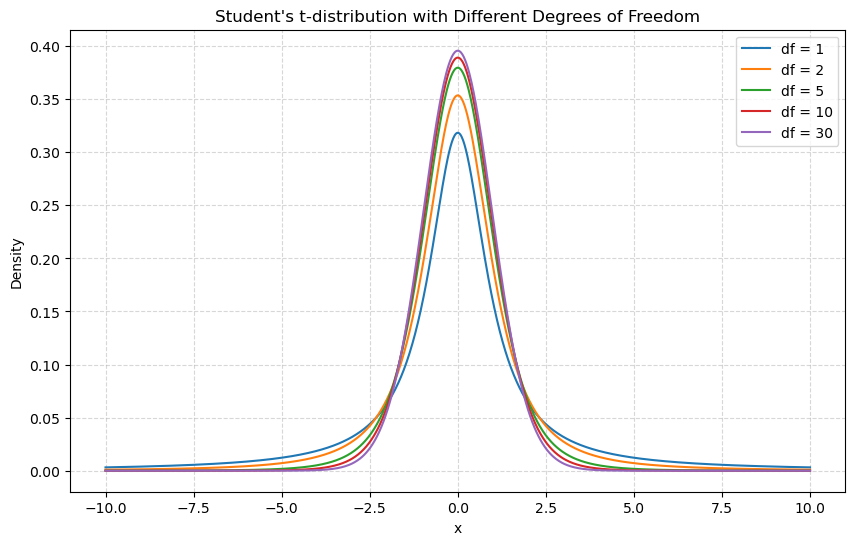

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Define a range for x
x = np.linspace(-10, 10, 1000)

# Different degrees of freedom for t-distribution
dfs = [1, 2, 5, 10, 30]

plt.figure(figsize=(10, 6))

for df in dfs:
    plt.plot(x, t(df).pdf(x), label=f"df = {df}")

plt.title("Student's t-distribution with Different Degrees of Freedom")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


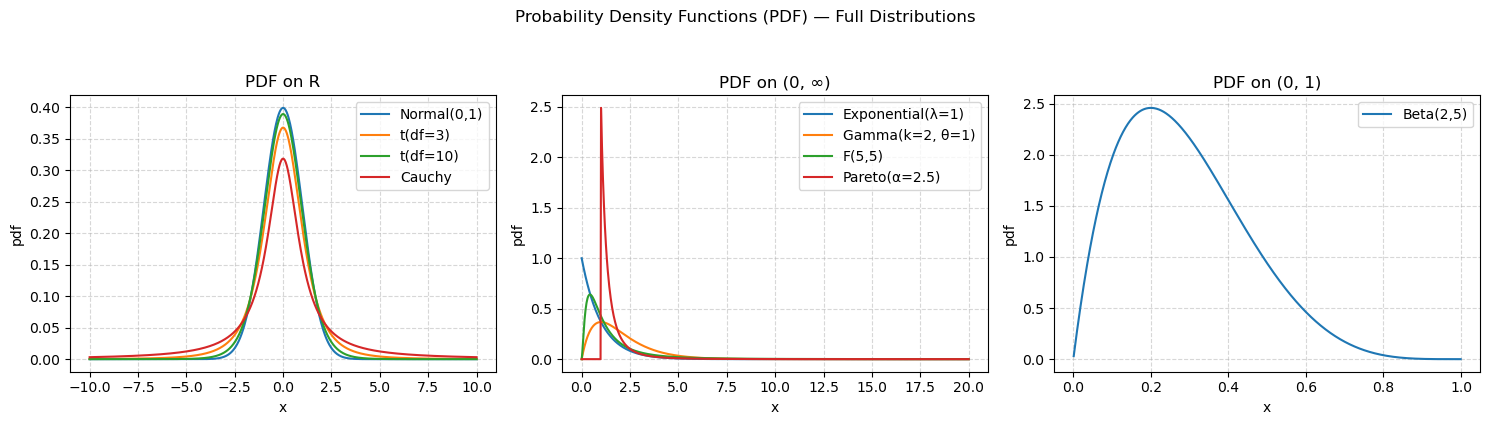

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, pareto, cauchy, t, f, gamma, beta

# ========================
# x 轴设置（按支持集分开）
# ========================
x_real = np.linspace(-10, 10, 800)       # Normal / t / Cauchy
x_pos  = np.linspace(0, 20, 800)         # Exponential / Pareto / F / Gamma
x_beta = np.linspace(0.001, 0.999, 800)  # Beta

# ========================
# 分布定义（与你原来一致 + 新增）
# ========================
dist_normal = norm(0, 1)
dist_expon  = expon(scale=1)

alpha = 2.5
dist_pareto = pareto(b=alpha)       # 支持集 x>=1（SciPy 的默认 loc=0, scale=1）
dist_cauchy = cauchy()
dist_t3     = t(df=3)
dist_t10    = t(df=10)

dist_f      = f(dfn=5, dfd=5)
dist_gamma  = gamma(a=2, scale=1)
dist_beta   = beta(a=2, b=5)

# ========================
# 画图：PDF（3 个子图放一起）
# ========================
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# (A) 全实数支持：Normal / t / Cauchy
axes[0].plot(x_real, dist_normal.pdf(x_real), label="Normal(0,1)")
axes[0].plot(x_real, dist_t3.pdf(x_real), label="t(df=3)")
axes[0].plot(x_real, dist_t10.pdf(x_real), label="t(df=10)")
axes[0].plot(x_real, dist_cauchy.pdf(x_real), label="Cauchy")
axes[0].set_title("PDF on R")
axes[0].set_xlabel("x")
axes[0].set_ylabel("pdf")
axes[0].grid(True, linestyle="--", alpha=0.5)
axes[0].legend()

# (B) 正半轴支持：Exponential / Pareto / F / Gamma
axes[1].plot(x_pos, dist_expon.pdf(x_pos), label="Exponential(λ=1)")
axes[1].plot(x_pos, dist_gamma.pdf(x_pos), label="Gamma(k=2, θ=1)")
axes[1].plot(x_pos, dist_f.pdf(x_pos), label="F(5,5)")

# Pareto 在 x<1 的 pdf 为 0（SciPy 默认从 1 开始），这里直接画即可
axes[1].plot(x_pos, dist_pareto.pdf(x_pos), label=f"Pareto(α={alpha})")

axes[1].set_title("PDF on (0, ∞)")
axes[1].set_xlabel("x")
axes[1].set_ylabel("pdf")
axes[1].grid(True, linestyle="--", alpha=0.5)
axes[1].legend()

# (C) 有界支持：Beta
axes[2].plot(x_beta, dist_beta.pdf(x_beta), label="Beta(2,5)")
axes[2].set_title("PDF on (0, 1)")
axes[2].set_xlabel("x")
axes[2].set_ylabel("pdf")
axes[2].grid(True, linestyle="--", alpha=0.5)
axes[2].legend()

fig.suptitle("Probability Density Functions (PDF) — Full Distributions", y=1.05)
fig.tight_layout()
plt.show()


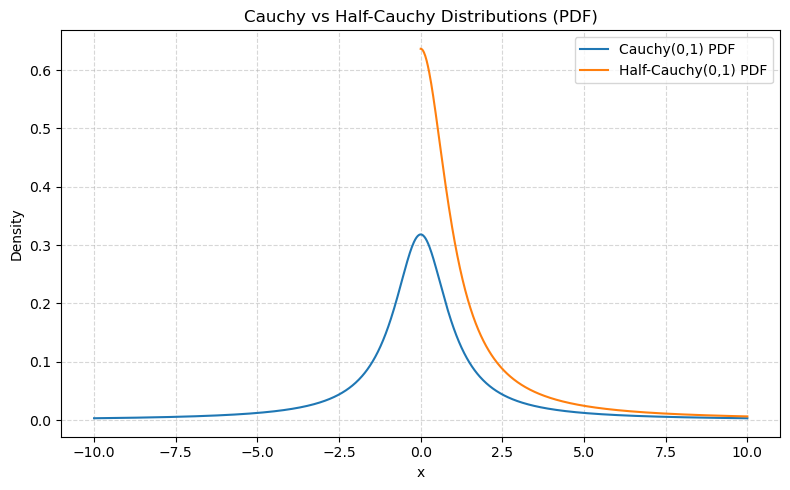

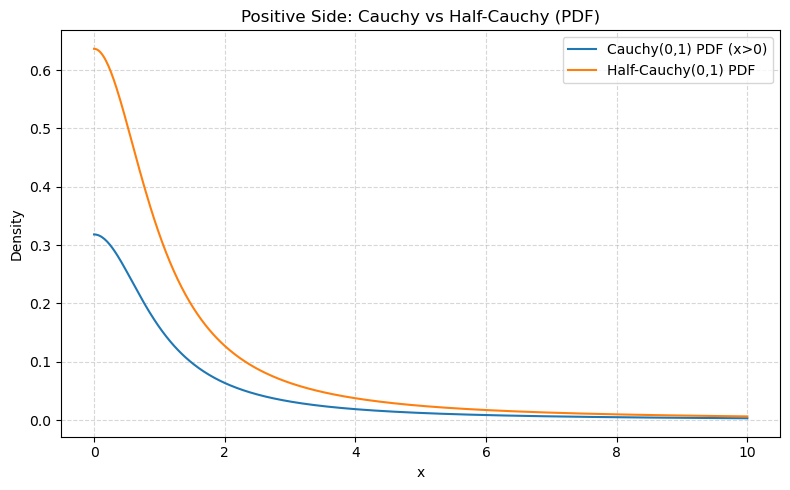

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy, halfcauchy

# 1. Full Cauchy vs Half-Cauchy on same figure (PDF)
x = np.linspace(-10, 10, 1000)
x_pos = np.linspace(0, 10, 500)

cauchy_pdf = cauchy.pdf(x)
halfcauchy_pdf = halfcauchy.pdf(x_pos)

plt.figure(figsize=(8, 5))
plt.plot(x, cauchy_pdf, label="Cauchy(0,1) PDF")
plt.plot(x_pos, halfcauchy_pdf, label="Half-Cauchy(0,1) PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Cauchy vs Half-Cauchy Distributions (PDF)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# 2. Show only positive side to see shape difference more clearly
plt.figure(figsize=(8, 5))
plt.plot(x_pos, cauchy.pdf(x_pos), label="Cauchy(0,1) PDF (x>0)")
plt.plot(x_pos, halfcauchy_pdf, label="Half-Cauchy(0,1) PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Positive Side: Cauchy vs Half-Cauchy (PDF)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


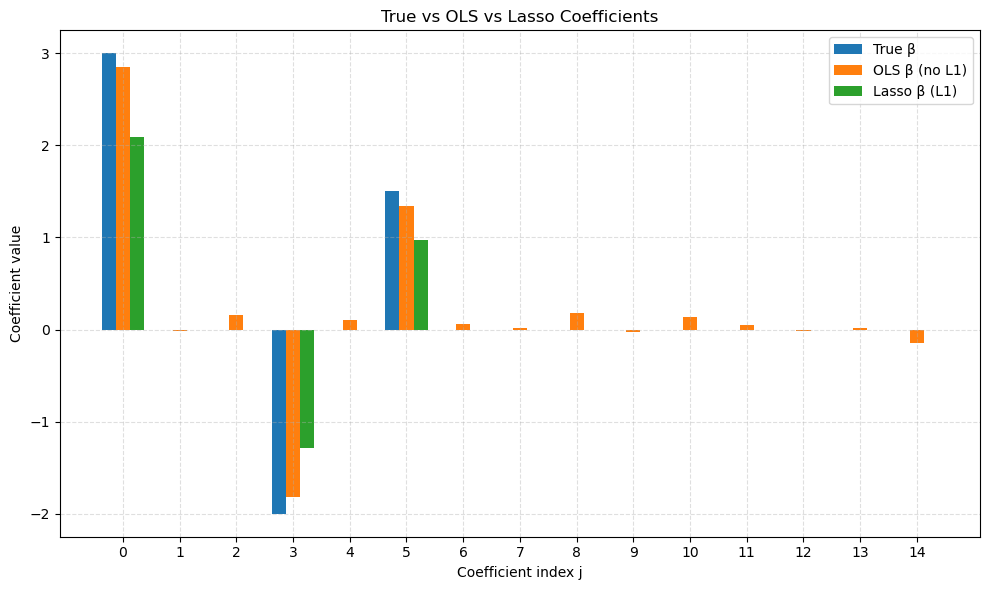

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ---- 1. Generate synthetic sparse regression data ----
np.random.seed(42)
n, p = 100, 15

# True sparse coefficients
beta_true = np.zeros(p)
beta_true[[0, 3, 5]] = [3.0, -2.0, 1.5]  # only 3 non-zero coefficients

# Design matrix and noise
X = np.random.normal(size=(n, p))
noise = np.random.normal(scale=1.0, size=n)
y = X @ beta_true + noise

# ---- 2. Ordinary Least Squares (no L1 penalty) ----
beta_ols, *_ = np.linalg.lstsq(X, y, rcond=None)

# ---- 3. Simple Lasso via coordinate descent ----
def lasso_coordinate_descent(X, y, lam, max_iter=200, tol=1e-4):
    n, p = X.shape
    # Standardize columns of X
    X_std = (X - X.mean(axis=0)) / X.std(axis=0)
    y_centered = y - y.mean()
    
    beta = np.zeros(p)
    for _ in range(max_iter):
        beta_old = beta.copy()
        for j in range(p):
            # Partial residual (excluding feature j)
            r_j = y_centered - X_std @ beta + X_std[:, j] * beta[j]
            rho_j = (X_std[:, j] * r_j).sum() / n
            
            # Soft-thresholding
            if rho_j < -lam / 2:
                beta[j] = (rho_j + lam / 2)
            elif rho_j > lam / 2:
                beta[j] = (rho_j - lam / 2)
            else:
                beta[j] = 0.0
        # Check convergence
        if np.max(np.abs(beta - beta_old)) < tol:
            break
    # Rescale back approximately (since we centered/scaled X, y, but for visualization
    # we only compare relative magnitudes, this is sufficient)
    return beta

lam = 0.8  # L1 penalty strength
beta_lasso = lasso_coordinate_descent(X, y, lam=lam)

# ---- 4. Visualize coefficient changes: True vs OLS vs Lasso ----

indices = np.arange(p)

plt.figure(figsize=(10, 6))
width = 0.25

plt.bar(indices - width, beta_true, width=width, label="True β")
plt.bar(indices, beta_ols, width=width, label="OLS β (no L1)")
plt.bar(indices + width, beta_lasso, width=width, label="Lasso β (L1)")

plt.xlabel("Coefficient index j")
plt.ylabel("Coefficient value")
plt.title("True vs OLS vs Lasso Coefficients")
plt.xticks(indices)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


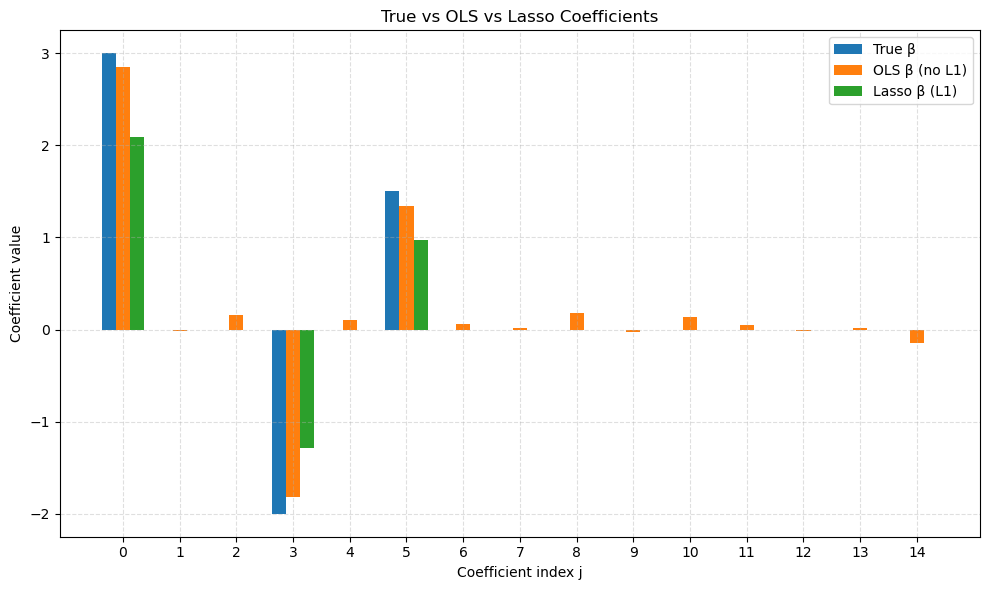

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# ---- 1. Generate synthetic sparse regression data ----
np.random.seed(42)
n, p = 100, 15

# True sparse coefficients
beta_true = np.zeros(p)
beta_true[[0, 3, 5]] = [3.0, -2.0, 1.5]  # only 3 non-zero coefficients

# Design matrix and noise
X = np.random.normal(size=(n, p))
noise = np.random.normal(scale=1.0, size=n)
y = X @ beta_true + noise

# ---- 2. Ordinary Least Squares (no L1 penalty) ----
beta_ols, *_ = np.linalg.lstsq(X, y, rcond=None)

# ---- 3. Simple Lasso via coordinate descent ----
def lasso_coordinate_descent(X, y, lam, max_iter=200, tol=1e-4):
    n, p = X.shape
    # Standardize columns of X
    X_std = (X - X.mean(axis=0)) / X.std(axis=0)
    y_centered = y - y.mean()
    
    beta = np.zeros(p)
    for _ in range(max_iter):
        beta_old = beta.copy()
        for j in range(p):
            # Partial residual (excluding feature j)
            r_j = y_centered - X_std @ beta + X_std[:, j] * beta[j]
            rho_j = (X_std[:, j] * r_j).sum() / n
            
            # Soft-thresholding
            if rho_j < -lam / 2:
                beta[j] = (rho_j + lam / 2)
            elif rho_j > lam / 2:
                beta[j] = (rho_j - lam / 2)
            else:
                beta[j] = 0.0
        # Check convergence
        if np.max(np.abs(beta - beta_old)) < tol:
            break
    return beta

lam = 0.8  # L1 penalty strength
beta_lasso = lasso_coordinate_descent(X, y, lam=lam)

# ---- 4. Visualize coefficient changes: True vs OLS vs Lasso ----

indices = np.arange(p)

plt.figure(figsize=(10, 6))
width = 0.25

plt.bar(indices - width, beta_true, width=width, label="True β")
plt.bar(indices, beta_ols, width=width, label="OLS β (no L1)")
plt.bar(indices + width, beta_lasso, width=width, label="Lasso β (L1)")

plt.xlabel("Coefficient index j")
plt.ylabel("Coefficient value")
plt.title("True vs OLS vs Lasso Coefficients")
plt.xticks(indices)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


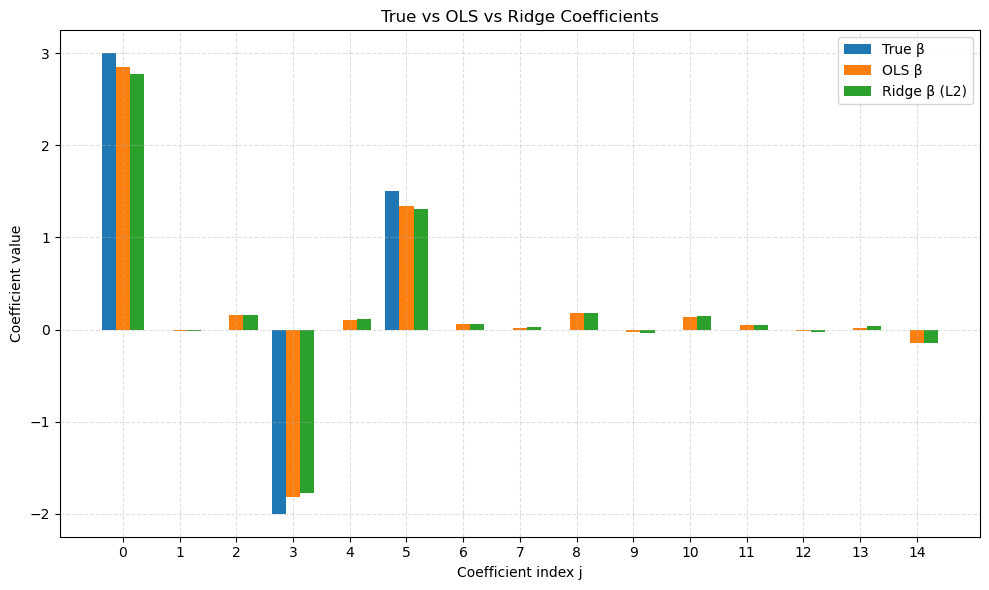

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ---- 1. Generate synthetic sparse regression data ----
np.random.seed(42)
n, p = 100, 15

beta_true = np.zeros(p)
beta_true[[0, 3, 5]] = [3.0, -2.0, 1.5]

X = np.random.normal(size=(n, p))
noise = np.random.normal(scale=1.0, size=n)
y = X @ beta_true + noise

# ---- 2. OLS ----
beta_ols, *_ = np.linalg.lstsq(X, y, rcond=None)

# ---- 3. Ridge Regression (closed-form solution) ----
alpha = 2.0  # Regularization strength

# Ridge solution: (X^T X + alpha * I)^(-1) X^T y
I = np.eye(p)
beta_ridge = np.linalg.inv(X.T @ X + alpha * I) @ X.T @ y

# ---- 4. Visualization ----
indices = np.arange(p)
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(indices - width, beta_true, width=width, label="True β")
plt.bar(indices, beta_ols, width=width, label="OLS β")
plt.bar(indices + width, beta_ridge, width=width, label="Ridge β (L2)")

plt.xlabel("Coefficient index j")
plt.ylabel("Coefficient value")
plt.title("True vs OLS vs Ridge Coefficients")
plt.xticks(indices)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# ----- 1. Design a setting where Ridge >> OLS -----
# Strong multicollinearity + p close to n
n_train, n_test, p = 60, 200, 50

# Latent factor to induce strong correlation among features
z_train = np.random.normal(size=(n_train, 1))
z_test = np.random.normal(size=(n_test, 1))

# Each feature is mostly driven by same latent factor + small noise
X_train = z_train @ np.ones((1, p)) + 0.1 * np.random.normal(size=(n_train, p))
X_test = z_test @ np.ones((1, p)) + 0.1 * np.random.normal(size=(n_test, p))

# True coefficients: all ones (dense model)
beta_true = np.ones(p)

# Generate response with noise
noise_train = np.random.normal(scale=1.0, size=n_train)
noise_test = np.random.normal(scale=1.0, size=n_test)

y_train = X_train @ beta_true + noise_train
y_test = X_test @ beta_true + noise_test

# ----- 2. Fit OLS -----
beta_ols, *_ = np.linalg.lstsq(X_train, y_train, rcond=None)
y_pred_ols = X_test @ beta_ols
mse_ols = np.mean((y_test - y_pred_ols) ** 2)

# ----- 3. Fit Ridge -----
def ridge_regression(X, y, alpha):
    p = X.shape[1]
    I = np.eye(p)
    return np.linalg.inv(X.T @ X + alpha * I) @ (X.T @ y)

alpha = 10.0
beta_ridge = ridge_regression(X_train, y_train, alpha=alpha)
y_pred_ridge = X_test @ beta_ridge
mse_ridge = np.mean((y_test - y_pred_ridge) ** 2)

mse_ols, mse_ridge


(np.float64(6.636611883516558), np.float64(0.9098830738167671))

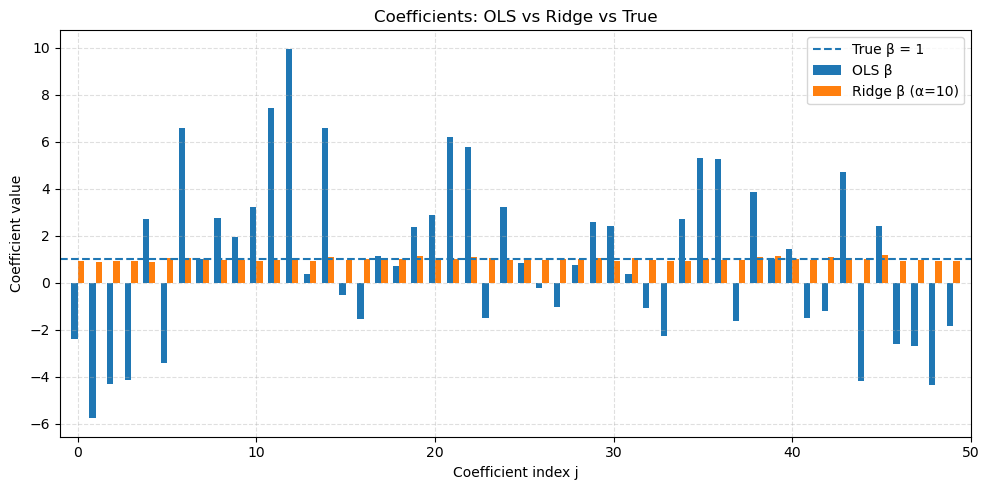

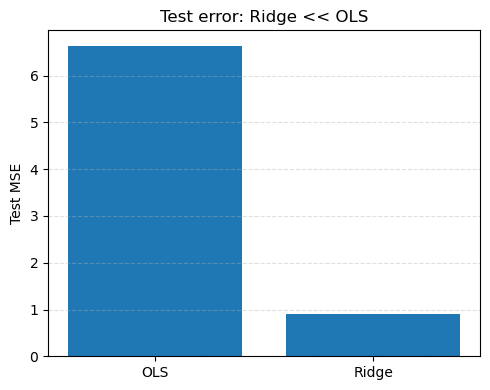

In [10]:
# Visualize coefficient magnitude and test MSE comparison

indices = np.arange(p)
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(indices - width/2, beta_ols, width=width, label="OLS β")
plt.bar(indices + width/2, beta_ridge, width=width, label="Ridge β (α=10)")
plt.hlines(1.0, -1, p, linestyles='dashed', label="True β = 1")
plt.xlim(-1, p)
plt.xlabel("Coefficient index j")
plt.ylabel("Coefficient value")
plt.title("Coefficients: OLS vs Ridge vs True")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,4))
plt.bar(["OLS", "Ridge"], [mse_ols, mse_ridge])
plt.ylabel("Test MSE")
plt.title("Test error: Ridge << OLS")
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


In [14]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# "less extreme" but still with noticeable multicollinearity
n_train, n_test, p = 120, 300, 20

# latent factor + independent noise
z_train = np.random.normal(size=(n_train, 1))
z_test = np.random.normal(size=(n_test, 1))

X_train = 0.7 * (z_train @ np.ones((1, p))) + 0.7 * np.random.normal(size=(n_train, p))
X_test = 0.7 * (z_test @ np.ones((1, p))) + 0.7 * np.random.normal(size=(n_test, p))

# moderately sparse-ish true beta (not all ones)
beta_true = np.zeros(p)
beta_true[[0, 1, 4, 7, 10, 13, 15, 18]] = [2.0, -1.5, 1.0, 1.8, -1.2, 0.8, 1.5, -0.7]

noise_train = np.random.normal(scale=1.0, size=n_train)
noise_test = np.random.normal(scale=1.0, size=n_test)

y_train = X_train @ beta_true + noise_train
y_test = X_test @ beta_true + noise_test

# OLS
beta_ols, *_ = np.linalg.lstsq(X_train, y_train, rcond=None)
y_pred_ols = X_test @ beta_ols
mse_ols = np.mean((y_test - y_pred_ols) ** 2)

# Ridge
def ridge_regression(X, y, alpha):
    p = X.shape[1]
    I = np.eye(p)
    return np.linalg.inv(X.T @ X + alpha * I) @ (X.T @ y)

alpha = 3.0
beta_ridge = ridge_regression(X_train, y_train, alpha=alpha)
y_pred_ridge = X_test @ beta_ridge
mse_ridge = np.mean((y_test - y_pred_ridge) ** 2)

mse_ols, mse_ridge

# Maybe increase correlation a bit and reduce n to make gap clearer but not crazy
np.random.seed(2)
n_train, n_test, p = 80, 300, 20

z_train = np.random.normal(size=(n_train, 1))
z_test = np.random.normal(size=(n_test, 1))

X_train = 0.85 * (z_train @ np.ones((1, p))) + 0.6 * np.random.normal(size=(n_train, p))
X_test = 0.85 * (z_test @ np.ones((1, p))) + 0.6 * np.random.normal(size=(n_test, p))

beta_true = np.zeros(p)
beta_true[[0, 1, 4, 7, 10, 13, 15, 18]] = [2.0, -1.5, 1.0, 1.8, -1.2, 0.8, 1.5, -0.7]

noise_train = np.random.normal(scale=1.0, size=n_train)
noise_test = np.random.normal(scale=1.0, size=n_test)

y_train = X_train @ beta_true + noise_train
y_test = X_test @ beta_true + noise_test

beta_ols, *_ = np.linalg.lstsq(X_train, y_train, rcond=None)
y_pred_ols = X_test @ beta_ols
mse_ols = np.mean((y_test - y_pred_ols) ** 2)

alpha = 5.0
beta_ridge = ridge_regression(X_train, y_train, alpha=alpha)
y_pred_ridge = X_test @ beta_ridge
mse_ridge = np.mean((y_test - y_pred_ridge) ** 2)

mse_ols, mse_ridge



(np.float64(0.984881866334778), np.float64(1.2495511693720396))

In [16]:
for alpha in [0.5, 1.0, 2.0, 3.0]:
    beta_ridge = ridge_regression(X_train, y_train, alpha=alpha)
    y_pred_ridge = X_test @ beta_ridge
    mse_ridge = np.mean((y_test - y_pred_ridge) ** 2)
    print(alpha, mse_ridge)


0.5 0.9976860188443285
1.0 1.0154590732999467
2.0 1.0620763091610963
3.0 1.1189134235424933


In [17]:
def simulate(seed=0):
    import numpy as np
    np.random.seed(seed)
    n_train, n_test, p = 80, 300, 20
    z_train = np.random.normal(size=(n_train, 1))
    z_test = np.random.normal(size=(n_test, 1))
    X_train = 0.8 * (z_train @ np.ones((1, p))) + 0.6 * np.random.normal(size=(n_train, p))
    X_test = 0.8 * (z_test @ np.ones((1, p))) + 0.6 * np.random.normal(size=(n_test, p))
    beta_true = np.zeros(p)
    beta_true[[0, 1, 4, 7, 10, 13, 15, 18]] = [2.0, -1.5, 1.0, 1.8, -1.2, 0.8, 1.5, -0.7]
    noise_train = np.random.normal(scale=1.2, size=n_train)
    noise_test = np.random.normal(scale=1.2, size=n_test)
    y_train = X_train @ beta_true + noise_train
    y_test = X_test @ beta_true + noise_test
    beta_ols, *_ = np.linalg.lstsq(X_train, y_train, rcond=None)
    y_pred_ols = X_test @ beta_ols
    mse_ols = np.mean((y_test - y_pred_ols)**2)
    def ridge(alpha):
        I = np.eye(p)
        beta_ridge = np.linalg.inv(X_train.T@X_train + alpha*I) @ X_train.T @ y_train
        y_pred = X_test @ beta_ridge
        return np.mean((y_test - y_pred)**2)
    mses = {a: ridge(a) for a in [0.1,0.5,1,2,3,5]}
    return mse_ols, mses

for s in range(5):
    mse_ols, mses = simulate(s)
    print("seed", s, "OLS", mse_ols, "Ridge best", min(mses.values()), "alpha", min(mses, key=mses.get))


seed 0 OLS 1.6335304073863923 Ridge best 1.6188928464444912 alpha 1
seed 1 OLS 2.403922023589684 Ridge best 2.338798452025497 alpha 2
seed 2 OLS 1.4177861913717227 Ridge best 1.4196355623930523 alpha 0.1
seed 3 OLS 1.6809762073281382 Ridge best 1.6803723759149432 alpha 0.5
seed 4 OLS 2.19033203611637 Ridge best 2.169005254957004 alpha 1


In [18]:
def simulate2(seed=0):
    import numpy as np
    np.random.seed(seed)
    n_train, n_test, p = 60, 200, 20
    z_train = np.random.normal(size=(n_train, 2))  # two latent factors
    z_test = np.random.normal(size=(n_test, 2))
    W = np.random.normal(size=(2, p))
    X_train = z_train @ W + 0.5 * np.random.normal(size=(n_train, p))
    X_test = z_test @ W + 0.5 * np.random.normal(size=(n_test, p))
    beta_true = np.random.normal(size=p)
    noise_train = np.random.normal(scale=1.5, size=n_train)
    noise_test = np.random.normal(scale=1.5, size=n_test)
    y_train = X_train @ beta_true + noise_train
    y_test = X_test @ beta_true + noise_test
    beta_ols, *_ = np.linalg.lstsq(X_train, y_train, rcond=None)
    y_pred_ols = X_test @ beta_ols
    mse_ols = np.mean((y_test - y_pred_ols)**2)
    def ridge(alpha):
        I = np.eye(p)
        beta_ridge = np.linalg.inv(X_train.T@X_train + alpha*I) @ X_train.T @ y_train
        y_pred = X_test @ beta_ridge
        return np.mean((y_test - y_pred)**2)
    mses = {a: ridge(a) for a in [0.1,0.5,1,2,3,5,10]}
    return mse_ols, mses

for s in range(10):
    mse_ols, mses = simulate2(s)
    print("seed", s, "OLS", round(mse_ols,3), "Ridge best", round(min(mses.values()),3), "alpha", min(mses, key=mses.get))


seed 0 OLS 2.977 Ridge best 2.199 alpha 3
seed 1 OLS 3.506 Ridge best 3.117 alpha 3
seed 2 OLS 3.871 Ridge best 3.059 alpha 5
seed 3 OLS 3.059 Ridge best 2.773 alpha 3
seed 4 OLS 2.739 Ridge best 2.522 alpha 2
seed 5 OLS 3.039 Ridge best 2.969 alpha 2
seed 6 OLS 3.698 Ridge best 2.973 alpha 5
seed 7 OLS 4.471 Ridge best 3.673 alpha 3
seed 8 OLS 2.093 Ridge best 1.885 alpha 2
seed 9 OLS 2.73 Ridge best 2.702 alpha 1


In [19]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# ----- 1. "比较正常"但有多重共线性的数据设定 -----
n_train, n_test, p = 60, 200, 20

# 两个潜在因子生成相关特征
z_train = np.random.normal(size=(n_train, 2))
z_test = np.random.normal(size=(n_test, 2))
W = np.random.normal(size=(2, p))

X_train = z_train @ W + 0.5 * np.random.normal(size=(n_train, p))
X_test = z_test @ W + 0.5 * np.random.normal(size=(n_test, p))

# 真实 beta：一般的 dense 系数
beta_true = np.random.normal(size=p)

noise_train = np.random.normal(scale=1.5, size=n_train)
noise_test = np.random.normal(scale=1.5, size=n_test)

y_train = X_train @ beta_true + noise_train
y_test = X_test @ beta_true + noise_test

# ----- 2. OLS -----
beta_ols, *_ = np.linalg.lstsq(X_train, y_train, rcond=None)
y_pred_ols = X_test @ beta_ols
mse_ols = np.mean((y_test - y_pred_ols) ** 2)

# ----- 3. Ridge -----
def ridge_regression(X, y, alpha):
    p = X.shape[1]
    I = np.eye(p)
    return np.linalg.inv(X.T @ X + alpha * I) @ (X.T @ y)

alpha = 3.0
beta_ridge = ridge_regression(X_train, y_train, alpha=alpha)
y_pred_ridge = X_test @ beta_ridge
mse_ridge = np.mean((y_test - y_pred_ridge) ** 2)

mse_ols, mse_ridge


(np.float64(2.976553423687919), np.float64(2.1986198717960512))

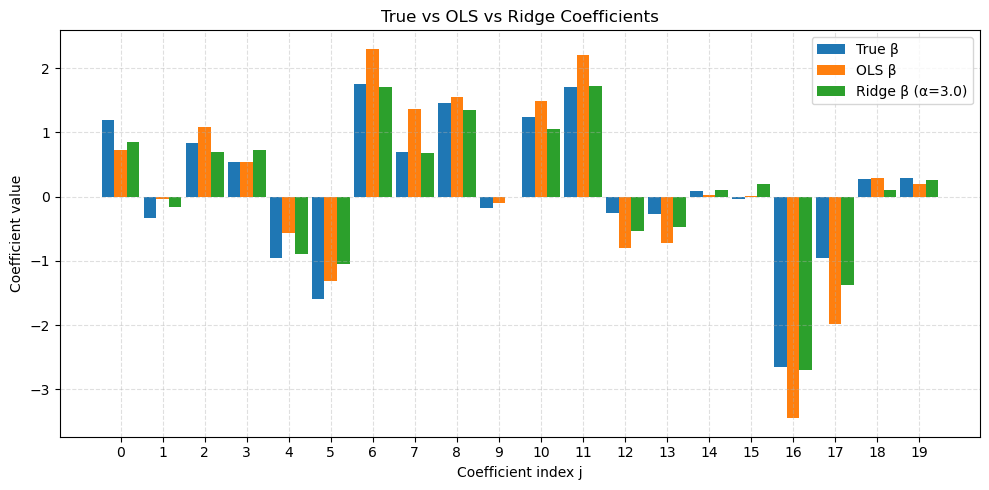

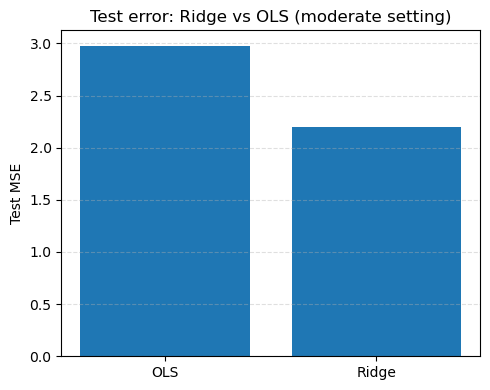

In [20]:
# 可视化：系数对比 & 测试误差对比
indices = np.arange(p)
width = 0.3

plt.figure(figsize=(10, 5))
plt.bar(indices - width, beta_true, width=width, label="True β")
plt.bar(indices, beta_ols, width=width, label="OLS β")
plt.bar(indices + width, beta_ridge, width=width, label=f"Ridge β (α={alpha})")
plt.xlabel("Coefficient index j")
plt.ylabel("Coefficient value")
plt.title("True vs OLS vs Ridge Coefficients")
plt.xticks(indices)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 4))
plt.bar(["OLS", "Ridge"], [mse_ols, mse_ridge])
plt.ylabel("Test MSE")
plt.title("Test error: Ridge vs OLS (moderate setting)")
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


Test MSE - OLS:    2.976553423687919
Test MSE - Ridge:  2.1986198717960512


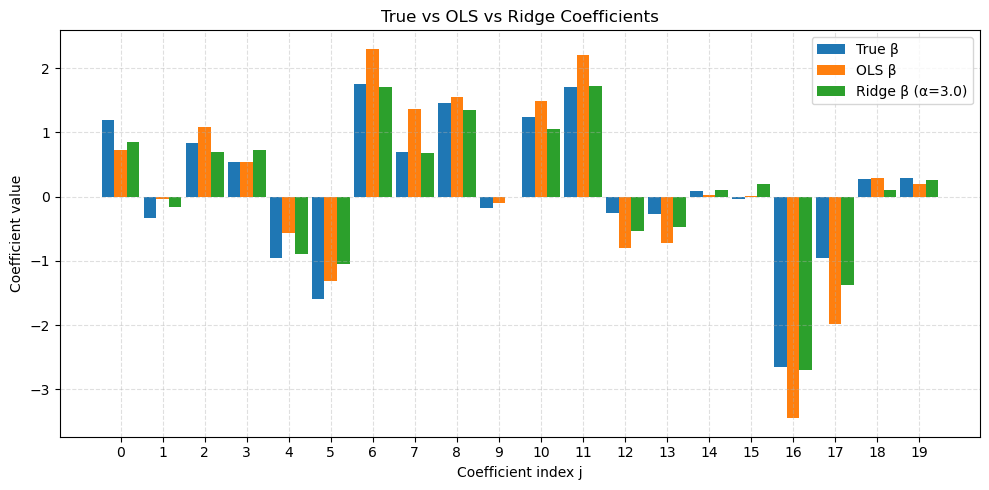

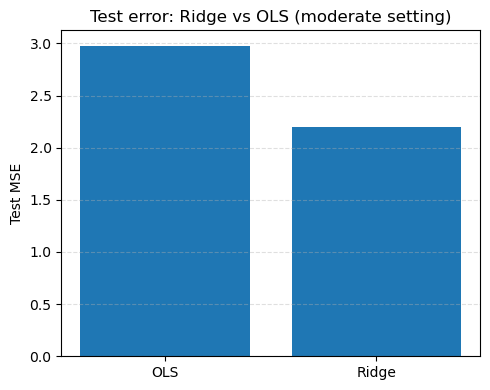

In [21]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# ----- 1. 数据设计：有一定多重共线性，但不极端 -----
n_train, n_test, p = 60, 200, 20

# 用两个隐因子 z 生成相关特征（相关但不完全共线）
z_train = np.random.normal(size=(n_train, 2))
z_test = np.random.normal(size=(n_test, 2))
W = np.random.normal(size=(2, p))

# 特征矩阵：z @ W + 小噪声
X_train = z_train @ W + 0.5 * np.random.normal(size=(n_train, p))
X_test = z_test @ W + 0.5 * np.random.normal(size=(n_test, p))

# 真实 beta：一般的 dense 系数
beta_true = np.random.normal(size=p)

# 生成响应 y
noise_train = np.random.normal(scale=1.5, size=n_train)
noise_test = np.random.normal(scale=1.5, size=n_test)

y_train = X_train @ beta_true + noise_train
y_test = X_test @ beta_true + noise_test

# ----- 2. OLS -----
beta_ols, *_ = np.linalg.lstsq(X_train, y_train, rcond=None)
y_pred_ols = X_test @ beta_ols
mse_ols = np.mean((y_test - y_pred_ols) ** 2)

# ----- 3. Ridge 回归 -----
def ridge_regression(X, y, alpha):
    p = X.shape[1]
    I = np.eye(p)
    return np.linalg.inv(X.T @ X + alpha * I) @ (X.T @ y)

alpha = 3.0
beta_ridge = ridge_regression(X_train, y_train, alpha=alpha)
y_pred_ridge = X_test @ beta_ridge
mse_ridge = np.mean((y_test - y_pred_ridge) ** 2)

print("Test MSE - OLS:   ", mse_ols)
print("Test MSE - Ridge: ", mse_ridge)

# ----- 4. 可视化：系数对比 -----
indices = np.arange(p)
width = 0.3

plt.figure(figsize=(10, 5))
plt.bar(indices - width, beta_true, width=width, label="True β")
plt.bar(indices, beta_ols, width=width, label="OLS β")
plt.bar(indices + width, beta_ridge, width=width, label=f"Ridge β (α={alpha})")
plt.xlabel("Coefficient index j")
plt.ylabel("Coefficient value")
plt.title("True vs OLS vs Ridge Coefficients")
plt.xticks(indices)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

# ----- 5. 可视化：测试误差对比 -----
plt.figure(figsize=(5, 4))
plt.bar(["OLS", "Ridge"], [mse_ols, mse_ridge])
plt.ylabel("Test MSE")
plt.title("Test error: Ridge vs OLS (moderate setting)")
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


SGL converged in iterations: 199


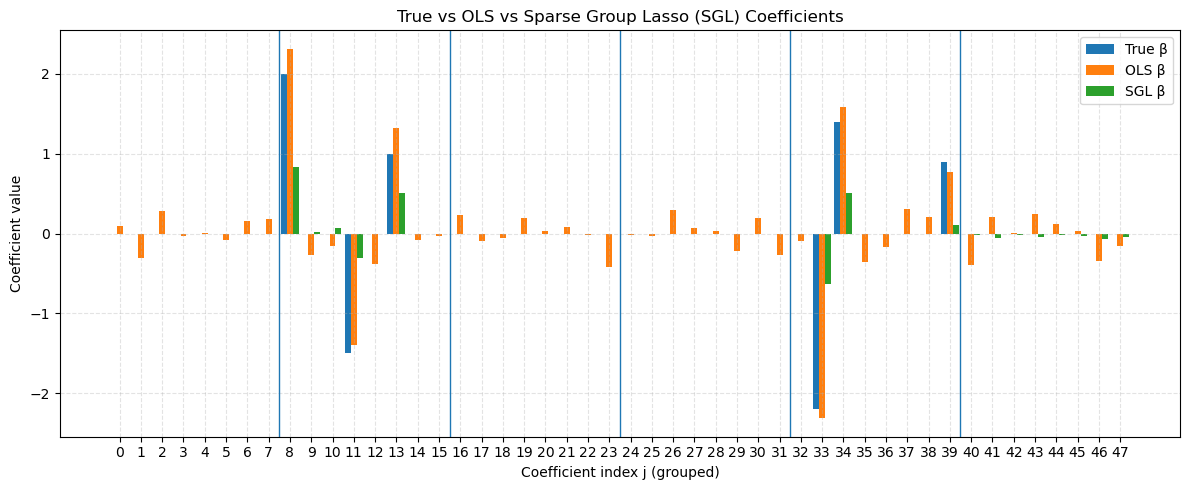

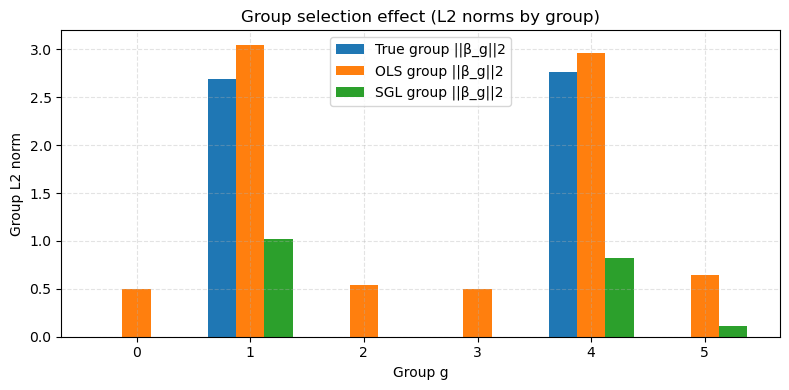

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Sparse Group Lasso (SGL) demo
# -------------------------------
np.random.seed(7)

# 1) Synthetic grouped design
n, G, group_size = 120, 6, 8
p = G * group_size

# Create groups: 0..G-1, each with group_size features
groups = [np.arange(g*group_size, (g+1)*group_size) for g in range(G)]

# Correlated features within each group (common latent factor per group)
Z = np.random.normal(size=(n, G))
X = np.zeros((n, p))
for g in range(G):
    # within-group correlation via shared factor + idiosyncratic noise
    X[:, groups[g]] = 0.8 * Z[:, [g]] + 0.6 * np.random.normal(size=(n, group_size))

# Standardize columns (important for lasso-type penalties)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# 2) True coefficients: group-sparse + within-group sparse
beta_true = np.zeros(p)
active_groups = [1, 4]  # only 2 groups truly active
beta_true[groups[1][[0, 3, 5]]] = [2.0, -1.5, 1.0]      # sparse within group 1
beta_true[groups[4][[1, 2, 7]]] = [-2.2, 1.4, 0.9]      # sparse within group 4

y = X @ beta_true + np.random.normal(scale=1.0, size=n)
y = y - y.mean()

# 3) Baseline: OLS (may spread weight across correlated features)
beta_ols, *_ = np.linalg.lstsq(X, y, rcond=None)

# 4) Fit SGL via proximal gradient (FISTA)
def soft_threshold(v, t):
    return np.sign(v) * np.maximum(np.abs(v) - t, 0.0)

def prox_sgl(v, t_l1, t_group, groups):
    """Prox for: t_l1 * ||beta||_1 + t_group * sum_g ||beta_g||_2"""
    out = v.copy()
    # elementwise soft-threshold (L1)
    out = soft_threshold(out, t_l1)
    # group shrinkage (L2 per group)
    for idx in groups:
        u = out[idx]
        norm_u = np.linalg.norm(u, 2)
        if norm_u <= t_group:
            out[idx] = 0.0
        else:
            out[idx] = (1.0 - t_group / norm_u) * u
    return out

def sgl_fista(X, y, groups, lam1=0.15, lam2=0.35, max_iter=2000, tol=1e-6):
    """
    Minimize: (1/(2n))||y - Xb||^2 + lam1||b||_1 + lam2 * sum_g ||b_g||_2
    """
    n, p = X.shape

    # Lipschitz constant of grad of (1/(2n))||y - Xb||^2 is ||X||_2^2 / n
    # compute spectral norm via SVD (p is small here)
    smax = np.linalg.svd(X, compute_uv=False)[0]
    L = (smax ** 2) / n
    step = 1.0 / L

    b = np.zeros(p)
    z = b.copy()
    t = 1.0

    for it in range(max_iter):
        b_old = b.copy()

        # gradient at z
        grad = (X.T @ (X @ z - y)) / n
        v = z - step * grad

        # proximal step
        b = prox_sgl(v, step * lam1, step * lam2, groups)

        # FISTA momentum
        t_new = 0.5 * (1 + np.sqrt(1 + 4 * t * t))
        z = b + ((t - 1) / t_new) * (b - b_old)
        t = t_new

        # convergence check
        if np.max(np.abs(b - b_old)) < tol:
            break

    return b, it + 1

beta_sgl, n_iter = sgl_fista(X, y, groups, lam1=0.12, lam2=0.45)
print("SGL converged in iterations:", n_iter)

# 5) Visualizations
idx = np.arange(p)
width = 0.28

plt.figure(figsize=(12, 5))
plt.bar(idx - width, beta_true, width=width, label="True β")
plt.bar(idx, beta_ols, width=width, label="OLS β")
plt.bar(idx + width, beta_sgl, width=width, label="SGL β")

# group separators
for g in range(1, G):
    plt.axvline(g*group_size - 0.5, linewidth=1)

plt.xlabel("Coefficient index j (grouped)")
plt.ylabel("Coefficient value")
plt.title("True vs OLS vs Sparse Group Lasso (SGL) Coefficients")
plt.xticks(idx)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.35)
plt.tight_layout()
plt.show()

# Group-level view: L2 norm per group (shows group selection)
def group_norms(beta, groups):
    return np.array([np.linalg.norm(beta[g], 2) for g in groups])

gn_true = group_norms(beta_true, groups)
gn_ols = group_norms(beta_ols, groups)
gn_sgl = group_norms(beta_sgl, groups)

plt.figure(figsize=(8, 4))
g_idx = np.arange(G)
w = 0.25
plt.bar(g_idx - w, gn_true, width=w, label="True group ||β_g||2")
plt.bar(g_idx, gn_ols, width=w, label="OLS group ||β_g||2")
plt.bar(g_idx + w, gn_sgl, width=w, label="SGL group ||β_g||2")
plt.xlabel("Group g")
plt.ylabel("Group L2 norm")
plt.title("Group selection effect (L2 norms by group)")
plt.xticks(g_idx)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.35)
plt.tight_layout()
plt.show()


SGL converged in iterations: 199


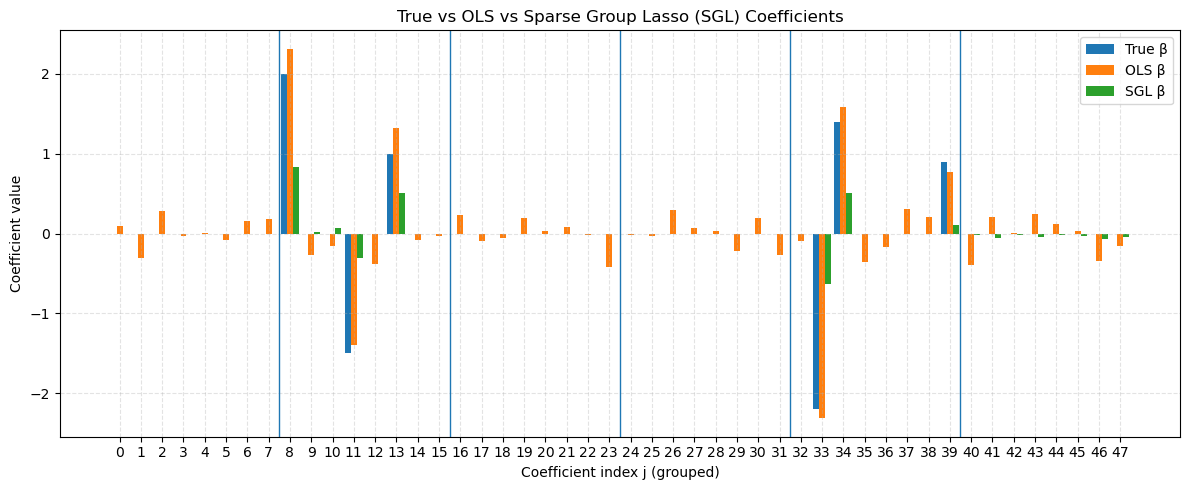

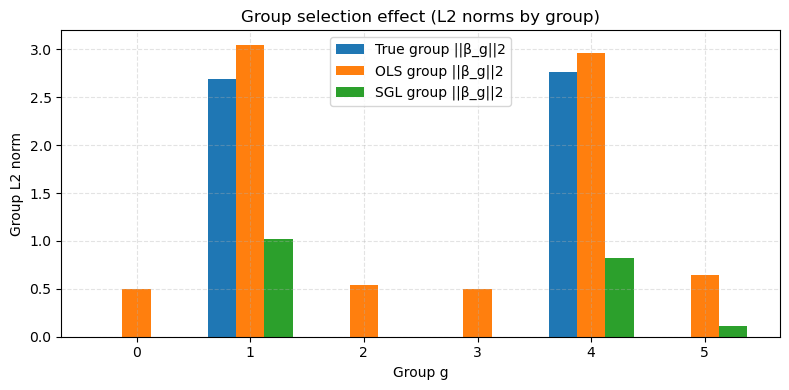

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Sparse Group Lasso (SGL) demo
# -------------------------------
np.random.seed(7)

# 1) Synthetic grouped design
n, G, group_size = 120, 6, 8
p = G * group_size

# Create groups: 0..G-1, each with group_size features
groups = [np.arange(g*group_size, (g+1)*group_size) for g in range(G)]

# Correlated features within each group (common latent factor per group)
Z = np.random.normal(size=(n, G))
X = np.zeros((n, p))
for g in range(G):
    # within-group correlation via shared factor + idiosyncratic noise
    X[:, groups[g]] = 0.8 * Z[:, [g]] + 0.6 * np.random.normal(size=(n, group_size))

# Standardize columns (important for lasso-type penalties)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# 2) True coefficients: group-sparse + within-group sparse
beta_true = np.zeros(p)
active_groups = [1, 4]  # only 2 groups truly active
beta_true[groups[1][[0, 3, 5]]] = [2.0, -1.5, 1.0]      # sparse within group 1
beta_true[groups[4][[1, 2, 7]]] = [-2.2, 1.4, 0.9]      # sparse within group 4

y = X @ beta_true + np.random.normal(scale=1.0, size=n)
y = y - y.mean()

# 3) Baseline: OLS (may spread weight across correlated features)
beta_ols, *_ = np.linalg.lstsq(X, y, rcond=None)

# 4) Fit SGL via proximal gradient (FISTA)
def soft_threshold(v, t):
    return np.sign(v) * np.maximum(np.abs(v) - t, 0.0)

def prox_sgl(v, t_l1, t_group, groups):
    """Prox for: t_l1 * ||beta||_1 + t_group * sum_g ||beta_g||_2"""
    out = v.copy()
    # elementwise soft-threshold (L1)
    out = soft_threshold(out, t_l1)
    # group shrinkage (L2 per group)
    for idx in groups:
        u = out[idx]
        norm_u = np.linalg.norm(u, 2)
        if norm_u <= t_group:
            out[idx] = 0.0
        else:
            out[idx] = (1.0 - t_group / norm_u) * u
    return out

def sgl_fista(X, y, groups, lam1=0.15, lam2=0.35, max_iter=2000, tol=1e-6):
    """
    Minimize: (1/(2n))||y - Xb||^2 + lam1||b||_1 + lam2 * sum_g ||b_g||_2
    """
    n, p = X.shape

    # Lipschitz constant of grad of (1/(2n))||y - Xb||^2 is ||X||_2^2 / n
    # compute spectral norm via SVD (p is small here)
    smax = np.linalg.svd(X, compute_uv=False)[0]
    L = (smax ** 2) / n
    step = 1.0 / L

    b = np.zeros(p)
    z = b.copy()
    t = 1.0

    for it in range(max_iter):
        b_old = b.copy()

        # gradient at z
        grad = (X.T @ (X @ z - y)) / n
        v = z - step * grad

        # proximal step
        b = prox_sgl(v, step * lam1, step * lam2, groups)

        # FISTA momentum
        t_new = 0.5 * (1 + np.sqrt(1 + 4 * t * t))
        z = b + ((t - 1) / t_new) * (b - b_old)
        t = t_new

        # convergence check
        if np.max(np.abs(b - b_old)) < tol:
            break

    return b, it + 1

beta_sgl, n_iter = sgl_fista(X, y, groups, lam1=0.12, lam2=0.45)
print("SGL converged in iterations:", n_iter)

# 5) Visualizations
idx = np.arange(p)
width = 0.28

plt.figure(figsize=(12, 5))
plt.bar(idx - width, beta_true, width=width, label="True β")
plt.bar(idx, beta_ols, width=width, label="OLS β")
plt.bar(idx + width, beta_sgl, width=width, label="SGL β")

# group separators
for g in range(1, G):
    plt.axvline(g*group_size - 0.5, linewidth=1)

plt.xlabel("Coefficient index j (grouped)")
plt.ylabel("Coefficient value")
plt.title("True vs OLS vs Sparse Group Lasso (SGL) Coefficients")
plt.xticks(idx)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.35)
plt.tight_layout()
plt.show()

# Group-level view: L2 norm per group (shows group selection)
def group_norms(beta, groups):
    return np.array([np.linalg.norm(beta[g], 2) for g in groups])

gn_true = group_norms(beta_true, groups)
gn_ols = group_norms(beta_ols, groups)
gn_sgl = group_norms(beta_sgl, groups)

plt.figure(figsize=(8, 4))
g_idx = np.arange(G)
w = 0.25
plt.bar(g_idx - w, gn_true, width=w, label="True group ||β_g||2")
plt.bar(g_idx, gn_ols, width=w, label="OLS group ||β_g||2")
plt.bar(g_idx + w, gn_sgl, width=w, label="SGL group ||β_g||2")
plt.xlabel("Group g")
plt.ylabel("Group L2 norm")
plt.title("Group selection effect (L2 norms by group)")
plt.xticks(g_idx)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.35)
plt.tight_layout()
plt.show()


C:\Users\simin\AppData\Local\Temp\ipykernel_3964\188884339.py:215: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([mses[m] for m in methods], labels=methods, showfliers=False)


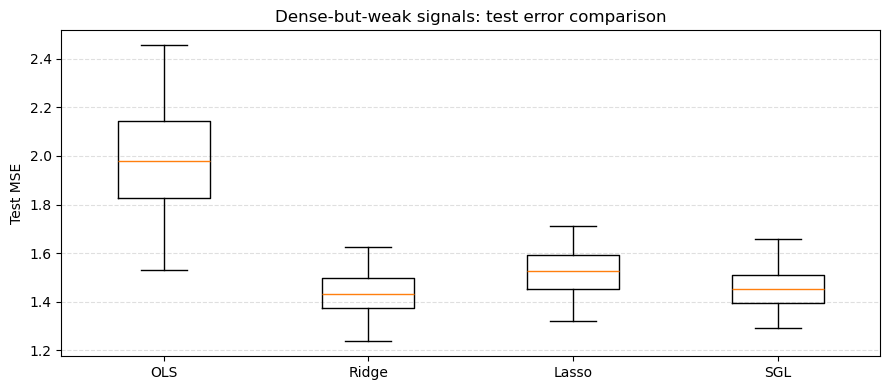

C:\Users\simin\AppData\Local\Temp\ipykernel_3964\188884339.py:226: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([nnzs[m] for m in methods], labels=methods, showfliers=False)


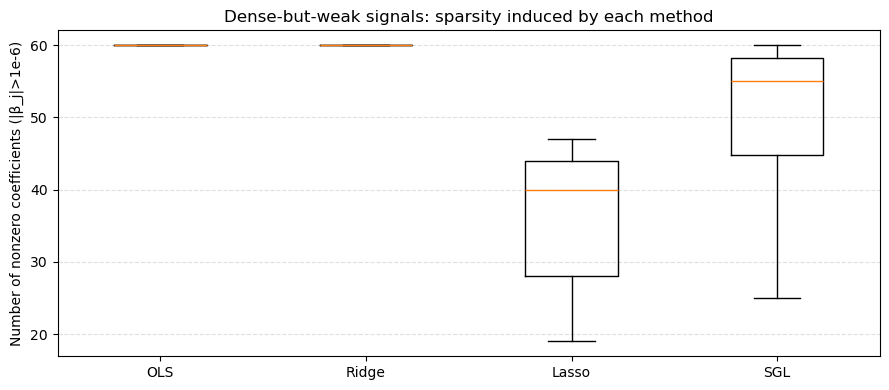

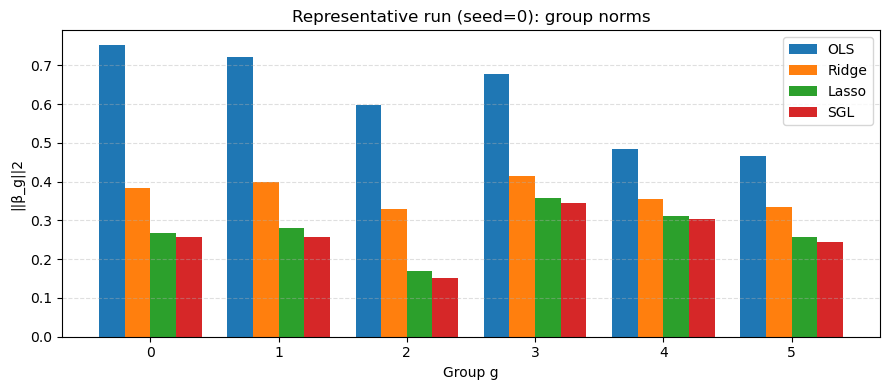

OLS   | Test MSE mean=1.976, std=0.237 | nnz mean=60.0
Ridge | Test MSE mean=1.430, std=0.099 | nnz mean=60.0
Lasso | Test MSE mean=1.510, std=0.123 | nnz mean=36.5
SGL   | Test MSE mean=1.455, std=0.123 | nnz mean=50.8


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Experiment: "dense-but-weak" signals across all groups
# Compare: OLS, Ridge, Lasso, SGL
# -------------------------------

def soft_threshold(v, t):
    return np.sign(v) * np.maximum(np.abs(v) - t, 0.0)

def lasso_cd(X, y, lam, max_iter=2000, tol=1e-6):
    """
    Lasso on standardized X, centered y:
    minimize (1/(2n))||y - Xb||^2 + lam||b||_1
    Coordinate descent with soft-thresholding.
    """
    n, p = X.shape
    b = np.zeros(p)
    # Precompute column norms (should be ~n if standardized, but keep general)
    col_norm2 = (X**2).sum(axis=0) / n
    for _ in range(max_iter):
        b_old = b.copy()
        r = y - X @ b
        for j in range(p):
            # add back contribution of j
            r_j = r + X[:, j] * b[j]
            rho = (X[:, j] @ r_j) / n
            # soft-threshold
            b[j] = soft_threshold(rho, lam) / (col_norm2[j] + 1e-12)
            # update residual
            r = r_j - X[:, j] * b[j]
        if np.max(np.abs(b - b_old)) < tol:
            break
    return b

def prox_sgl(v, t_l1, t_group, groups):
    """Prox for: t_l1||b||_1 + t_group * sum_g ||b_g||_2"""
    out = soft_threshold(v, t_l1)
    for idx in groups:
        u = out[idx]
        nu = np.linalg.norm(u, 2)
        if nu <= t_group:
            out[idx] = 0.0
        else:
            out[idx] = (1.0 - t_group / nu) * u
    return out

def sgl_fista(X, y, groups, lam1, lam2, max_iter=4000, tol=1e-6):
    """
    Minimize: (1/(2n))||y - Xb||^2 + lam1||b||_1 + lam2*sum_g||b_g||_2
    X assumed standardized, y centered.
    """
    n, p = X.shape
    smax = np.linalg.svd(X, compute_uv=False)[0]
    L = (smax**2) / n
    step = 1.0 / L

    b = np.zeros(p)
    z = b.copy()
    t = 1.0

    for it in range(max_iter):
        b_old = b.copy()
        grad = (X.T @ (X @ z - y)) / n
        v = z - step * grad
        b = prox_sgl(v, step * lam1, step * lam2, groups)

        t_new = 0.5 * (1 + np.sqrt(1 + 4 * t * t))
        z = b + ((t - 1) / t_new) * (b - b_old)
        t = t_new

        if np.max(np.abs(b - b_old)) < tol:
            return b
    return b

def ridge_closed_form(X, y, alpha):
    p = X.shape[1]
    return np.linalg.inv(X.T @ X + alpha * np.eye(p)) @ (X.T @ y)

def standardize_fit_transform(X_train, X_val, X_test):
    mu = X_train.mean(axis=0)
    sd = X_train.std(axis=0) + 1e-12
    return (X_train - mu)/sd, (X_val - mu)/sd, (X_test - mu)/sd

def mse(y, yhat):
    return np.mean((y - yhat)**2)

def simulate_one(seed=0, n_train=120, n_val=120, n_test=300, G=6, group_size=10, corr=0.6, noise=1.0, beta_scale=0.15):
    np.random.seed(seed)
    p = G * group_size
    groups = [np.arange(g*group_size, (g+1)*group_size) for g in range(G)]

    # latent factors per group -> within-group correlation
    Ztr = np.random.normal(size=(n_train, G))
    Zva = np.random.normal(size=(n_val, G))
    Zte = np.random.normal(size=(n_test, G))

    def makeX(Z, n):
        X = np.zeros((n, p))
        for g in range(G):
            # x_{i, group} = corr*z_g + sqrt(1-corr^2)*eps
            X[:, groups[g]] = corr * Z[:, [g]] + np.sqrt(max(1e-12, 1 - corr**2)) * np.random.normal(size=(n, group_size))
        return X

    X_train = makeX(Ztr, n_train)
    X_val = makeX(Zva, n_val)
    X_test = makeX(Zte, n_test)

    # Dense-but-weak true beta across ALL groups
    beta_true = np.random.normal(scale=beta_scale, size=p)

    y_train = X_train @ beta_true + np.random.normal(scale=noise, size=n_train)
    y_val = X_val @ beta_true + np.random.normal(scale=noise, size=n_val)
    y_test = X_test @ beta_true + np.random.normal(scale=noise, size=n_test)

    # standardize X using training stats; center y
    X_train, X_val, X_test = standardize_fit_transform(X_train, X_val, X_test)
    y_train_c = y_train - y_train.mean()
    y_val_c = y_val - y_train.mean()
    y_test_c = y_test - y_train.mean()

    # OLS
    beta_ols, *_ = np.linalg.lstsq(X_train, y_train_c, rcond=None)

    # Hyperparameter grids (lightweight)
    ridge_grid = [0.0, 0.1, 0.3, 1.0, 3.0, 10.0, 30.0]
    lasso_grid = [0.001, 0.003, 0.01, 0.03, 0.08, 0.15, 0.25]
    sgl_lam1_grid = [0.001, 0.003, 0.01, 0.03, 0.08]
    sgl_lam2_grid = [0.01, 0.03, 0.08, 0.15, 0.25]

    # Ridge tuning
    best_ridge = None
    best_ridge_mse = 1e18
    for a in ridge_grid:
        if a == 0.0:
            b = beta_ols
        else:
            b = ridge_closed_form(X_train, y_train_c, a)
        val = mse(y_val_c, X_val @ b)
        if val < best_ridge_mse:
            best_ridge_mse = val
            best_ridge = (a, b)

    # Lasso tuning
    best_lasso = None
    best_lasso_mse = 1e18
    for lam in lasso_grid:
        b = lasso_cd(X_train, y_train_c, lam)
        val = mse(y_val_c, X_val @ b)
        if val < best_lasso_mse:
            best_lasso_mse = val
            best_lasso = (lam, b)

    # SGL tuning (coarse grid)
    best_sgl = None
    best_sgl_mse = 1e18
    for lam1 in sgl_lam1_grid:
        for lam2 in sgl_lam2_grid:
            b = sgl_fista(X_train, y_train_c, groups, lam1=lam1, lam2=lam2)
            val = mse(y_val_c, X_val @ b)
            if val < best_sgl_mse:
                best_sgl_mse = val
                best_sgl = ((lam1, lam2), b)

    # Evaluate on test
    results = {}
    results["OLS"] = (mse(y_test_c, X_test @ beta_ols), beta_ols)
    a, b = best_ridge
    results["Ridge"] = (mse(y_test_c, X_test @ b), b)
    lam, b = best_lasso
    results["Lasso"] = (mse(y_test_c, X_test @ b), b)
    (lam1, lam2), b = best_sgl
    results["SGL"] = (mse(y_test_c, X_test @ b), b)

    # summary stats: sparsity
    def nnz(b, eps=1e-6):
        return int((np.abs(b) > eps).sum())
    def group_nnz(b, eps=1e-6):
        return np.array([int((np.abs(b[g]) > eps).sum()) for g in groups])
    def group_norms(b):
        return np.array([np.linalg.norm(b[g], 2) for g in groups])

    meta = {
        "beta_true": beta_true,
        "groups": groups,
        "best_ridge_alpha": best_ridge[0],
        "best_lasso_lam": best_lasso[0],
        "best_sgl": best_sgl[0],
    }
    stats = {k: {"mse": v[0], "nnz": nnz(v[1]), "group_nnz": group_nnz(v[1]), "group_norms": group_norms(v[1])}
             for k, v in results.items()}
    return stats, meta

# -------------------------------
# Run multiple seeds
# -------------------------------
seeds = list(range(20))
all_stats = []
metas = []
for s in seeds:
    stats, meta = simulate_one(seed=s, corr=0.6, noise=1.0, beta_scale=0.15)
    all_stats.append(stats)
    metas.append(meta)

methods = ["OLS", "Ridge", "Lasso", "SGL"]

mses = {m: np.array([all_stats[i][m]["mse"] for i in range(len(seeds))]) for m in methods}
nnzs = {m: np.array([all_stats[i][m]["nnz"] for i in range(len(seeds))]) for m in methods}

# -------------------------------
# Plot 1: Test MSE distribution (boxplot)
# -------------------------------
plt.figure(figsize=(9, 4))
plt.boxplot([mses[m] for m in methods], labels=methods, showfliers=False)
plt.ylabel("Test MSE")
plt.title("Dense-but-weak signals: test error comparison")
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

# -------------------------------
# Plot 2: Number of nonzeros (boxplot)
# -------------------------------
plt.figure(figsize=(9, 4))
plt.boxplot([nnzs[m] for m in methods], labels=methods, showfliers=False)
plt.ylabel("Number of nonzero coefficients (|β_j|>1e-6)")
plt.title("Dense-but-weak signals: sparsity induced by each method")
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

# -------------------------------
# Plot 3: One representative seed: group norms
# -------------------------------
rep = 0
groups = metas[rep]["groups"]
G = len(groups)
g_idx = np.arange(G)
w = 0.2

plt.figure(figsize=(9, 4))
for k, m in enumerate(methods):
    plt.bar(g_idx + (k-1.5)*w, all_stats[rep][m]["group_norms"], width=w, label=m)
plt.xlabel("Group g")
plt.ylabel("||β_g||2")
plt.title(f"Representative run (seed={seeds[rep]}): group norms")
plt.xticks(g_idx)
plt.legend()
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

# -------------------------------
# Print concise numeric summary
# -------------------------------
for m in methods:
    print(f"{m:5s} | Test MSE mean={mses[m].mean():.3f}, std={mses[m].std():.3f} | nnz mean={nnzs[m].mean():.1f}")


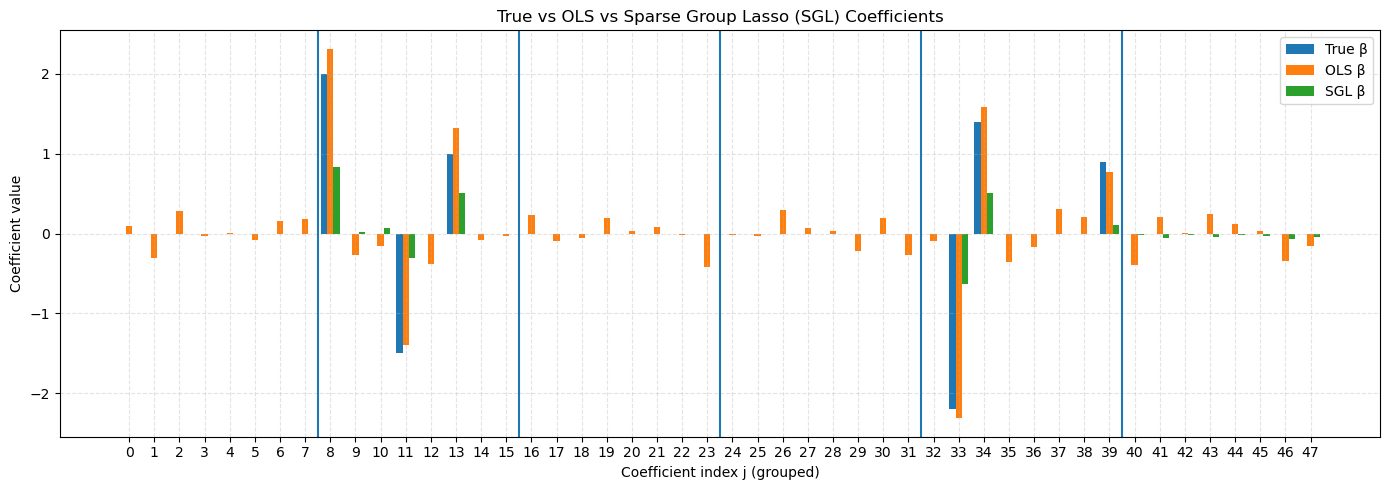

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1) 生成带组结构的数据（组内相关）
# -------------------------------
np.random.seed(7)

n, G, group_size = 120, 6, 8
p = G * group_size
groups = [np.arange(g * group_size, (g + 1) * group_size) for g in range(G)]

Z = np.random.normal(size=(n, G))
X = np.zeros((n, p))
for g in range(G):
    # 组内相关：共同因子 + 噪声
    X[:, groups[g]] = 0.8 * Z[:, [g]] + 0.6 * np.random.normal(size=(n, group_size))

# 标准化（Lasso/SGL 很关键）
X = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-12)

# 真值：只激活少数组，且组内稀疏（方便看图）
beta_true = np.zeros(p)
beta_true[groups[1][[0, 3, 5]]] = [2.0, -1.5, 1.0]
beta_true[groups[4][[1, 2, 7]]] = [-2.2, 1.4, 0.9]

y = X @ beta_true + np.random.normal(scale=1.0, size=n)
y = y - y.mean()

# -------------------------------
# 2) OLS
# -------------------------------
beta_ols, *_ = np.linalg.lstsq(X, y, rcond=None)

# -------------------------------
# 3) SGL（FISTA + prox）
#    minimize: (1/(2n))||y - Xb||^2 + lam1||b||_1 + lam2 sum_g ||b_g||_2
# -------------------------------
def soft_threshold(v, t):
    return np.sign(v) * np.maximum(np.abs(v) - t, 0.0)

def prox_sgl(v, t_l1, t_group, groups):
    out = soft_threshold(v, t_l1)  # L1：组内稀疏
    for idx in groups:             # group-L2：组级稀疏
        u = out[idx]
        nu = np.linalg.norm(u, 2)
        if nu <= t_group:
            out[idx] = 0.0
        else:
            out[idx] = (1.0 - t_group / nu) * u
    return out

def sgl_fista(X, y, groups, lam1=0.12, lam2=0.45, max_iter=4000, tol=1e-6):
    n, p = X.shape
    smax = np.linalg.svd(X, compute_uv=False)[0]  # spectral norm
    L = (smax ** 2) / n
    step = 1.0 / L

    b = np.zeros(p)
    z = b.copy()
    t = 1.0

    for _ in range(max_iter):
        b_old = b.copy()
        grad = (X.T @ (X @ z - y)) / n
        v = z - step * grad
        b = prox_sgl(v, step * lam1, step * lam2, groups)

        t_new = 0.5 * (1.0 + np.sqrt(1.0 + 4.0 * t * t))
        z = b + ((t - 1.0) / t_new) * (b - b_old)
        t = t_new

        if np.max(np.abs(b - b_old)) < tol:
            break

    return b

beta_sgl = sgl_fista(X, y, groups, lam1=0.12, lam2=0.45)

# -------------------------------
# 4) 画“你截图那种”并排柱状图 + 组边界
# -------------------------------
idx = np.arange(p)
bar_w = 0.25

plt.figure(figsize=(14, 5))

plt.bar(idx - bar_w, beta_true, width=bar_w, label="True β")
plt.bar(idx,          beta_ols, width=bar_w, label="OLS β")
plt.bar(idx + bar_w,  beta_sgl, width=bar_w, label="SGL β")

# 组边界竖线（和你截图类似）
for g in range(1, G):
    plt.axvline(g * group_size - 0.5, linewidth=1.5)

plt.xlabel("Coefficient index j (grouped)")
plt.ylabel("Coefficient value")
plt.title("True vs OLS vs Sparse Group Lasso (SGL) Coefficients")
plt.xticks(idx)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.35)
plt.tight_layout()
plt.show()


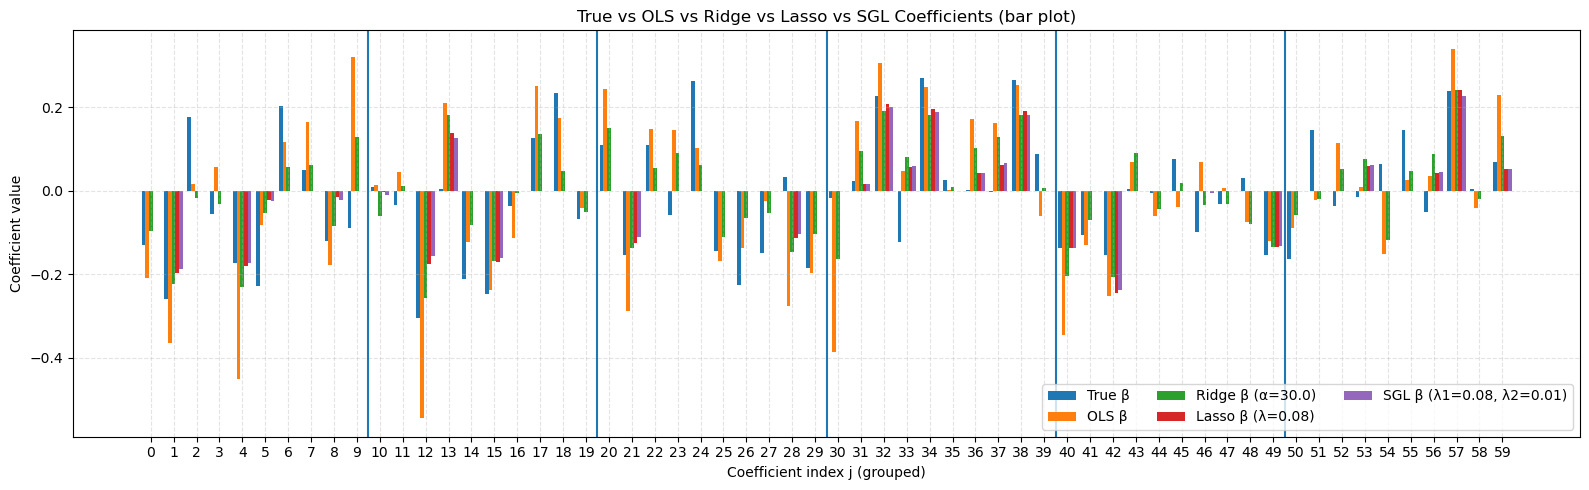

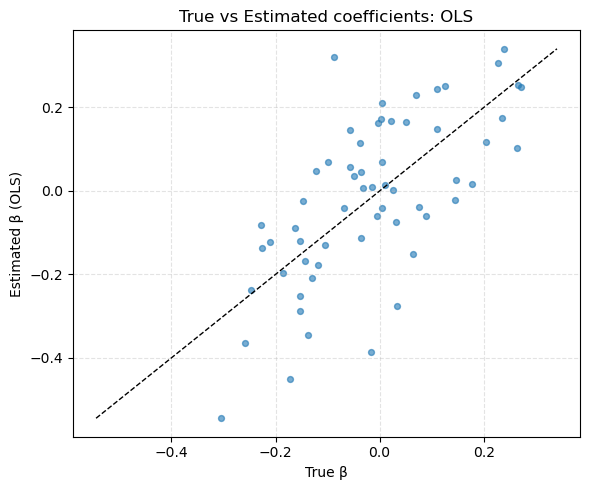

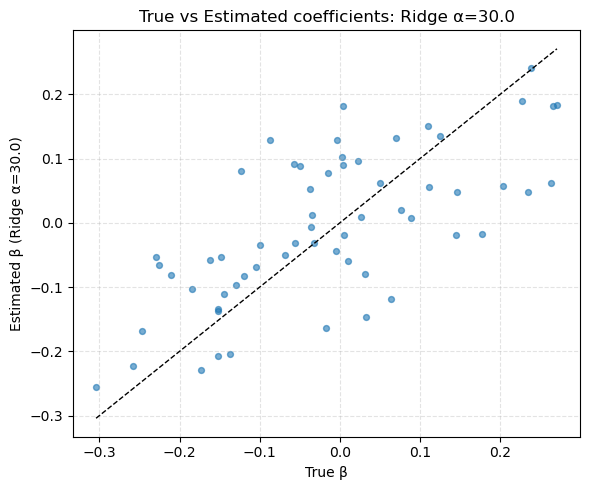

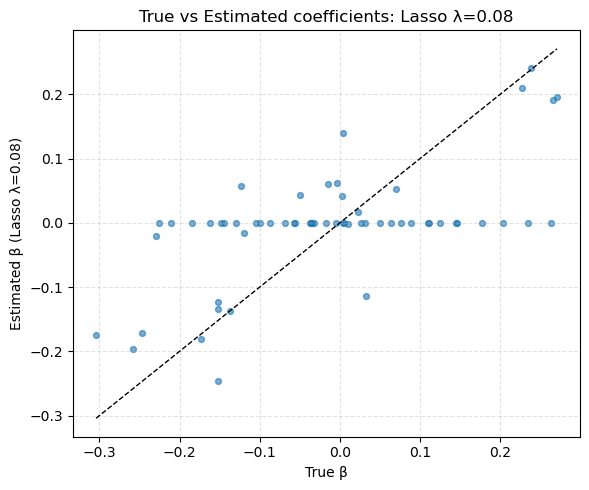

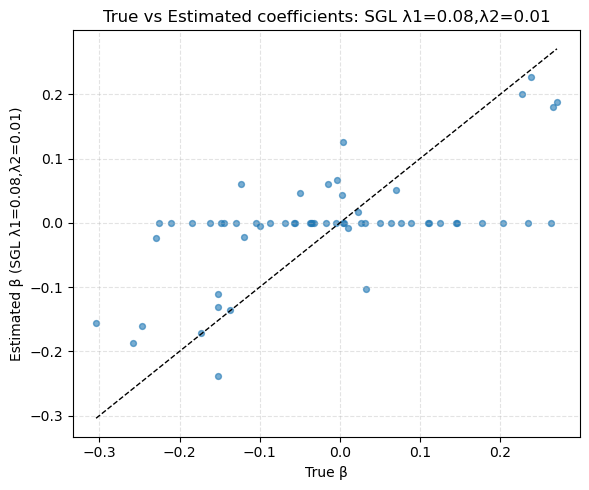

C:\Users\simin\AppData\Local\Temp\ipykernel_3964\682629843.py:209: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([errs[k] for k in errs.keys()], labels=list(errs.keys()), showfliers=False)


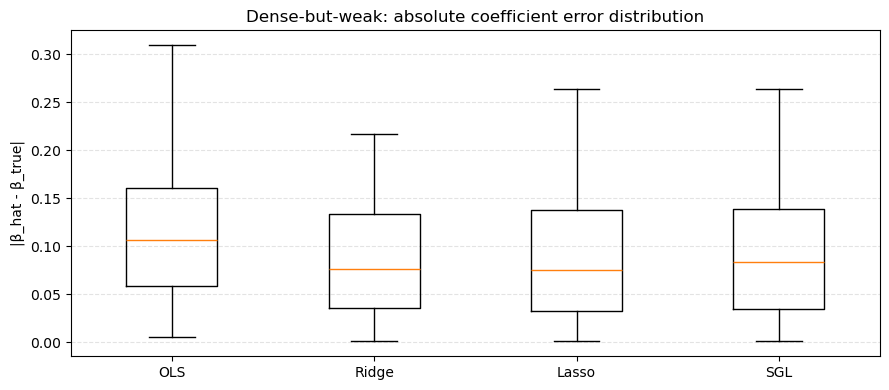

Representative run test MSEs:
  OLS  : 1.909382034445632
  Ridge: 1.5339281182680644 alpha 30.0
  Lasso: 1.6344811209254493 lambda 0.08
  SGL  : 1.6450528602802728 lam1,lam2 (0.08, 0.01)


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Reuse the functions from the previous experiment by redefining minimal needed parts
def soft_threshold(v, t):
    return np.sign(v) * np.maximum(np.abs(v) - t, 0.0)

def lasso_cd(X, y, lam, max_iter=2000, tol=1e-6):
    n, p = X.shape
    b = np.zeros(p)
    col_norm2 = (X**2).sum(axis=0) / n
    for _ in range(max_iter):
        b_old = b.copy()
        r = y - X @ b
        for j in range(p):
            r_j = r + X[:, j] * b[j]
            rho = (X[:, j] @ r_j) / n
            b[j] = soft_threshold(rho, lam) / (col_norm2[j] + 1e-12)
            r = r_j - X[:, j] * b[j]
        if np.max(np.abs(b - b_old)) < tol:
            break
    return b

def prox_sgl(v, t_l1, t_group, groups):
    out = soft_threshold(v, t_l1)
    for idx in groups:
        u = out[idx]
        nu = np.linalg.norm(u, 2)
        if nu <= t_group:
            out[idx] = 0.0
        else:
            out[idx] = (1.0 - t_group / nu) * u
    return out

def sgl_fista(X, y, groups, lam1, lam2, max_iter=4000, tol=1e-6):
    n, p = X.shape
    smax = np.linalg.svd(X, compute_uv=False)[0]
    L = (smax**2) / n
    step = 1.0 / L
    b = np.zeros(p)
    z = b.copy()
    t = 1.0
    for _ in range(max_iter):
        b_old = b.copy()
        grad = (X.T @ (X @ z - y)) / n
        v = z - step * grad
        b = prox_sgl(v, step * lam1, step * lam2, groups)
        t_new = 0.5 * (1 + np.sqrt(1 + 4 * t * t))
        z = b + ((t - 1) / t_new) * (b - b_old)
        t = t_new
        if np.max(np.abs(b - b_old)) < tol:
            break
    return b

def ridge_closed_form(X, y, alpha):
    p = X.shape[1]
    return np.linalg.inv(X.T @ X + alpha * np.eye(p)) @ (X.T @ y)

def mse(y, yhat):
    return np.mean((y - yhat)**2)

# ---- Create one representative dense-but-weak dataset (same regime) ----
np.random.seed(0)
n_train, n_val, n_test = 120, 120, 300
G, group_size = 6, 10
p = G * group_size
groups = [np.arange(g*group_size, (g+1)*group_size) for g in range(G)]

corr = 0.6
noise = 1.0
beta_scale = 0.15

Ztr = np.random.normal(size=(n_train, G))
Zva = np.random.normal(size=(n_val, G))
Zte = np.random.normal(size=(n_test, G))

def makeX(Z, n):
    X = np.zeros((n, p))
    for g in range(G):
        X[:, groups[g]] = corr * Z[:, [g]] + np.sqrt(1 - corr**2) * np.random.normal(size=(n, group_size))
    return X

X_train = makeX(Ztr, n_train)
X_val = makeX(Zva, n_val)
X_test = makeX(Zte, n_test)

beta_true = np.random.normal(scale=beta_scale, size=p)

y_train = X_train @ beta_true + np.random.normal(scale=noise, size=n_train)
y_val = X_val @ beta_true + np.random.normal(scale=noise, size=n_val)
y_test = X_test @ beta_true + np.random.normal(scale=noise, size=n_test)

# Standardize by training stats; center y
mu = X_train.mean(axis=0)
sd = X_train.std(axis=0) + 1e-12
X_train_s = (X_train - mu) / sd
X_val_s = (X_val - mu) / sd
X_test_s = (X_test - mu) / sd

y_mean = y_train.mean()
y_train_c = y_train - y_mean
y_val_c = y_val - y_mean
y_test_c = y_test - y_mean

# ---- Fit OLS ----
beta_ols, *_ = np.linalg.lstsq(X_train_s, y_train_c, rcond=None)

# ---- Tune Ridge / Lasso / SGL on validation (coarse grids) ----
ridge_grid = [0.1, 0.3, 1.0, 3.0, 10.0, 30.0]
lasso_grid = [0.001, 0.003, 0.01, 0.03, 0.08, 0.15, 0.25]
sgl_lam1_grid = [0.001, 0.003, 0.01, 0.03, 0.08]
sgl_lam2_grid = [0.01, 0.03, 0.08, 0.15, 0.25]

best = {}

# Ridge
best_val = 1e18
for a in ridge_grid:
    b = ridge_closed_form(X_train_s, y_train_c, a)
    val = mse(y_val_c, X_val_s @ b)
    if val < best_val:
        best_val = val
        best["Ridge"] = (a, b, val)

# Lasso
best_val = 1e18
for lam in lasso_grid:
    b = lasso_cd(X_train_s, y_train_c, lam)
    val = mse(y_val_c, X_val_s @ b)
    if val < best_val:
        best_val = val
        best["Lasso"] = (lam, b, val)

# SGL
best_val = 1e18
for lam1 in sgl_lam1_grid:
    for lam2 in sgl_lam2_grid:
        b = sgl_fista(X_train_s, y_train_c, groups, lam1=lam1, lam2=lam2)
        val = mse(y_val_c, X_val_s @ b)
        if val < best_val:
            best_val = val
            best["SGL"] = ((lam1, lam2), b, val)

beta_ridge = best["Ridge"][1]
beta_lasso = best["Lasso"][1]
beta_sgl = best["SGL"][1]

# ---- 1) Coefficient BAR plot (grouped): True/OLS/Ridge/Lasso/SGL ----
idx = np.arange(p)
bar_w = 0.16
lam1, lam2 = best["SGL"][0]

plt.figure(figsize=(16, 5))
plt.bar(idx - 2*bar_w, beta_true,  width=bar_w, label="True β")
plt.bar(idx - 1*bar_w, beta_ols,   width=bar_w, label="OLS β")
plt.bar(idx,           beta_ridge, width=bar_w, label=f"Ridge β (α={best['Ridge'][0]})")
plt.bar(idx + 1*bar_w, beta_lasso, width=bar_w, label=f"Lasso β (λ={best['Lasso'][0]})")
plt.bar(idx + 2*bar_w, beta_sgl,   width=bar_w, label=f"SGL β (λ1={lam1}, λ2={lam2})")

for g in range(1, G):
    plt.axvline(g * group_size - 0.5, linewidth=1.5)

plt.xlabel("Coefficient index j (grouped)")
plt.ylabel("Coefficient value")
plt.title("True vs OLS vs Ridge vs Lasso vs SGL Coefficients (bar plot)")
plt.xticks(idx)
plt.legend(ncol=3)
plt.grid(True, linestyle="--", alpha=0.35)
plt.tight_layout()
plt.show()

# ---- 2) True vs Estimated scatter (shrinkage view) ----
def scatter_true_est(beta_est, name):
    plt.scatter(beta_true, beta_est, alpha=0.6, s=18)
    lo = min(beta_true.min(), beta_est.min())
    hi = max(beta_true.max(), beta_est.max())
    plt.plot([lo, hi], [lo, hi], 'k--', linewidth=1)
    plt.xlabel("True β")
    plt.ylabel(f"Estimated β ({name})")
    plt.title(f"True vs Estimated coefficients: {name}")
    plt.grid(True, linestyle="--", alpha=0.35)
    plt.tight_layout()

plt.figure(figsize=(6, 5))
scatter_true_est(beta_ols, "OLS")
plt.show()

plt.figure(figsize=(6, 5))
scatter_true_est(beta_ridge, f"Ridge α={best['Ridge'][0]}")
plt.show()

plt.figure(figsize=(6, 5))
scatter_true_est(beta_lasso, f"Lasso λ={best['Lasso'][0]}")
plt.show()

plt.figure(figsize=(6, 5))
scatter_true_est(beta_sgl, f"SGL λ1={lam1},λ2={lam2}")
plt.show()

# ---- 3) Absolute coefficient error by method (distribution) ----
errs = {
    "OLS": np.abs(beta_ols - beta_true),
    "Ridge": np.abs(beta_ridge - beta_true),
    "Lasso": np.abs(beta_lasso - beta_true),
    "SGL": np.abs(beta_sgl - beta_true),
}

plt.figure(figsize=(9, 4))
plt.boxplot([errs[k] for k in errs.keys()], labels=list(errs.keys()), showfliers=False)
plt.ylabel("|β_hat - β_true|")
plt.title("Dense-but-weak: absolute coefficient error distribution")
plt.grid(True, axis="y", linestyle="--", alpha=0.35)
plt.tight_layout()
plt.show()

# Print test MSE for this run (for context)
print("Representative run test MSEs:")
print("  OLS  :", mse(y_test_c, X_test_s @ beta_ols))
print("  Ridge:", mse(y_test_c, X_test_s @ beta_ridge), "alpha", best["Ridge"][0])
print("  Lasso:", mse(y_test_c, X_test_s @ beta_lasso), "lambda", best["Lasso"][0])
print("  SGL  :", mse(y_test_c, X_test_s @ beta_sgl), "lam1,lam2", best["SGL"][0])


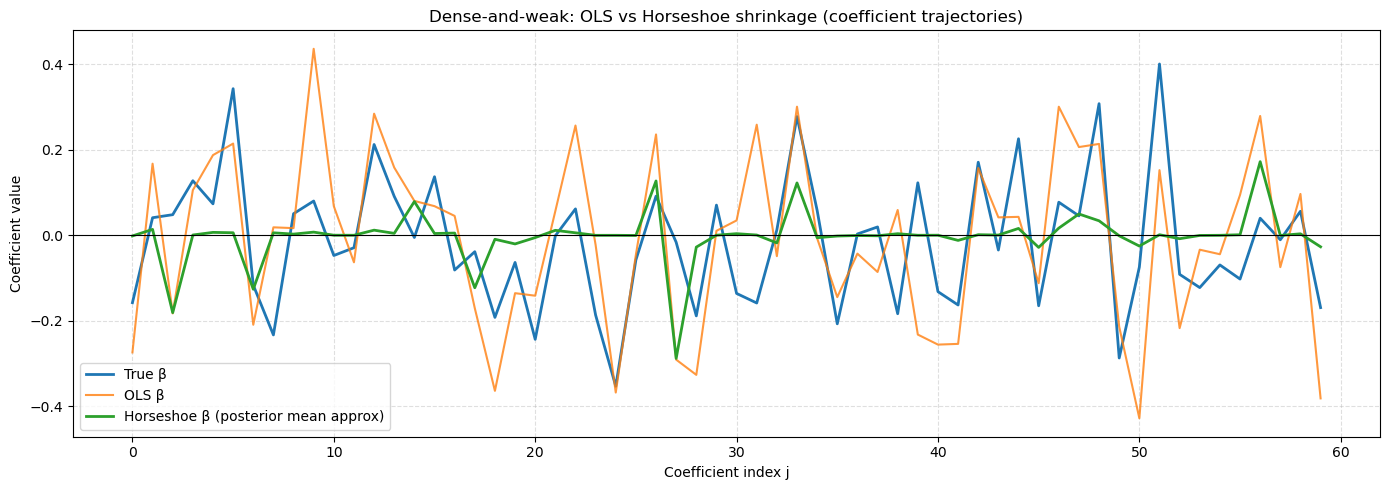

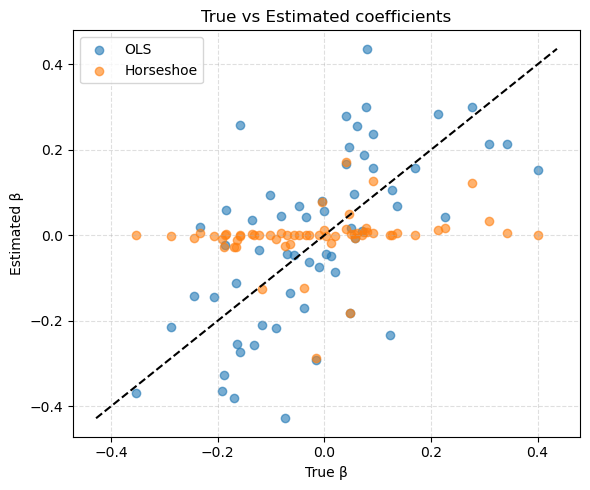

C:\Users\simin\AppData\Local\Temp\ipykernel_3964\4282948723.py:93: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([err_ols, err_hs], labels=["OLS", "Horseshoe"], showfliers=False)


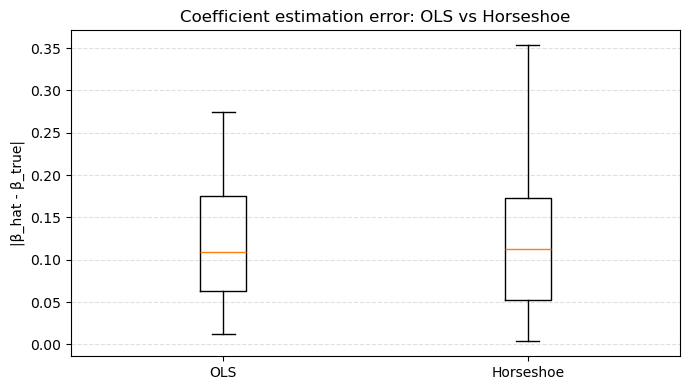

Mean absolute error:
OLS      : 0.1304080071456933
Horseshoe: 0.124170636885491


In [32]:
# Horseshoe shrinkage: before vs after visualization
# Dense-and-weak setting, comparing OLS vs Horseshoe posterior mean (approx)

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# -----------------------------
# 1. Generate dense-and-weak data
# -----------------------------
n, p = 120, 60
X = np.random.normal(size=(n, p))

# True beta: dense & weak
beta_true = np.random.normal(scale=0.15, size=p)

y = X @ beta_true + np.random.normal(scale=1.0, size=n)

# Standardize X, center y
X = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-12)
y = y - y.mean()

# -----------------------------
# 2. OLS estimate
# -----------------------------
beta_ols, *_ = np.linalg.lstsq(X, y, rcond=None)

# -----------------------------
# 3. Approximate Horseshoe shrinkage
#    (posterior mean-style shrinkage)
# -----------------------------
# This is a common deterministic approximation:
# beta_HS = (1 - kappa_j) * beta_ols
# where kappa_j = 1 / (1 + lambda_j^2 * tau^2 * s_j^2)

# global shrinkage
tau = 0.2

# local scales ~ half-Cauchy
lambda_j = np.abs(np.random.standard_cauchy(size=p))
lambda_j = np.clip(lambda_j, 1e-3, 50)

# empirical variance of OLS noise per coefficient
s_j2 = np.var(X, axis=0)

kappa = 1 / (1 + (tau**2) * (lambda_j**2) * s_j2)
beta_hs = (1 - kappa) * beta_ols

# -----------------------------
# 4. Visualization
# -----------------------------
idx = np.arange(p)

plt.figure(figsize=(14, 5))
plt.plot(idx, beta_true, label="True β", linewidth=2)
plt.plot(idx, beta_ols, label="OLS β", alpha=0.8)
plt.plot(idx, beta_hs, label="Horseshoe β (posterior mean approx)", linewidth=2)

plt.axhline(0, color="black", linewidth=0.8)
plt.xlabel("Coefficient index j")
plt.ylabel("Coefficient value")
plt.title("Dense-and-weak: OLS vs Horseshoe shrinkage (coefficient trajectories)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

# -----------------------------
# 5. Shrinkage visualization: True vs Estimated
# -----------------------------
plt.figure(figsize=(6, 5))
plt.scatter(beta_true, beta_ols, alpha=0.6, label="OLS")
plt.scatter(beta_true, beta_hs, alpha=0.6, label="Horseshoe")
lo = min(beta_true.min(), beta_ols.min(), beta_hs.min())
hi = max(beta_true.max(), beta_ols.max(), beta_hs.max())
plt.plot([lo, hi], [lo, hi], 'k--')
plt.xlabel("True β")
plt.ylabel("Estimated β")
plt.title("True vs Estimated coefficients")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

# -----------------------------
# 6. Absolute error comparison
# -----------------------------
err_ols = np.abs(beta_ols - beta_true)
err_hs = np.abs(beta_hs - beta_true)

plt.figure(figsize=(7, 4))
plt.boxplot([err_ols, err_hs], labels=["OLS", "Horseshoe"], showfliers=False)
plt.ylabel("|β_hat - β_true|")
plt.title("Coefficient estimation error: OLS vs Horseshoe")
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

print("Mean absolute error:")
print("OLS      :", err_ols.mean())
print("Horseshoe:", err_hs.mean())


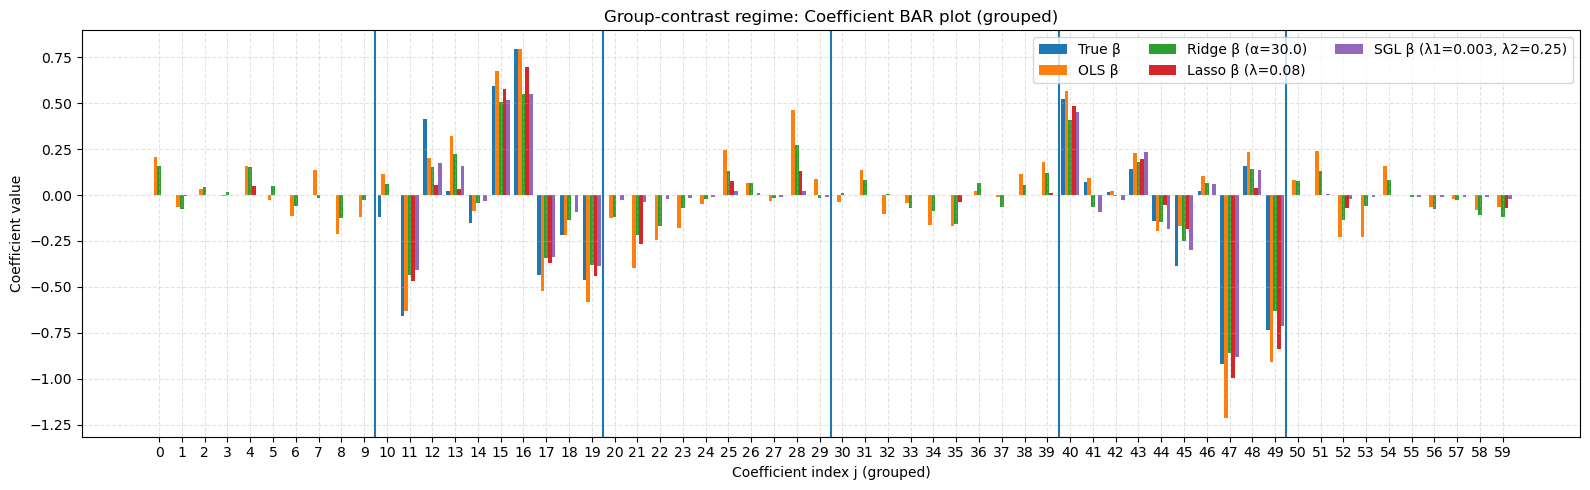

Test MSEs (for reference):
  OLS  : 1.8543970186205971
  Ridge: 1.4594409976331255 alpha 30.0
  Lasso: 1.3186784123760555 lambda 0.08
  SGL  : 1.1865333277750028 lam1,lam2 (0.003, 0.25)


In [33]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# -------------------------------
# Group-contrast data generator
# -------------------------------
n_train, n_val, n_test = 140, 140, 300
G, group_size = 6, 10
p = G * group_size
groups = [np.arange(g*group_size, (g+1)*group_size) for g in range(G)]

corr = 0.7
noise = 1.0

def makeX(n):
    Z = np.random.normal(size=(n, G))
    X = np.zeros((n, p))
    for g in range(G):
        X[:, groups[g]] = corr * Z[:, [g]] + np.sqrt(1 - corr**2) * np.random.normal(size=(n, group_size))
    return X

X_train = makeX(n_train)
X_val   = makeX(n_val)
X_test  = makeX(n_test)

# True beta: strong contrast (only a few groups active)
beta_true = np.zeros(p)
active_groups = [1, 4]  # only these groups are truly relevant

# Make the active groups moderately dense (many nonzeros) to show clear block contrast
beta_true[groups[1]] = np.random.normal(loc=0.0, scale=0.45, size=group_size)
beta_true[groups[4]] = np.random.normal(loc=0.0, scale=0.45, size=group_size)

# (Optional) add a couple of standout coefficients within active groups
beta_true[groups[1][2]] += 0.8
beta_true[groups[4][7]] -= 0.8

y_train = X_train @ beta_true + np.random.normal(scale=noise, size=n_train)
y_val   = X_val   @ beta_true + np.random.normal(scale=noise, size=n_val)
y_test  = X_test  @ beta_true + np.random.normal(scale=noise, size=n_test)

# Standardize X by training stats; center y
mu = X_train.mean(axis=0)
sd = X_train.std(axis=0) + 1e-12
X_train_s = (X_train - mu) / sd
X_val_s   = (X_val   - mu) / sd
X_test_s  = (X_test  - mu) / sd

y_mean = y_train.mean()
y_train_c = y_train - y_mean
y_val_c   = y_val   - y_mean
y_test_c  = y_test  - y_mean

# -------------------------------
# Baseline: OLS
# -------------------------------
beta_ols, *_ = np.linalg.lstsq(X_train_s, y_train_c, rcond=None)

# -------------------------------
# Ridge / Lasso / SGL (simple tuning on validation)
# -------------------------------
def mse(y, yhat):
    return np.mean((y - yhat)**2)

def ridge_closed_form(X, y, alpha):
    p = X.shape[1]
    return np.linalg.inv(X.T @ X + alpha * np.eye(p)) @ (X.T @ y)

def soft_threshold(v, t):
    return np.sign(v) * np.maximum(np.abs(v) - t, 0.0)

def lasso_cd(X, y, lam, max_iter=2000, tol=1e-6):
    n, p = X.shape
    b = np.zeros(p)
    col_norm2 = (X**2).sum(axis=0) / n
    for _ in range(max_iter):
        b_old = b.copy()
        r = y - X @ b
        for j in range(p):
            r_j = r + X[:, j] * b[j]
            rho = (X[:, j] @ r_j) / n
            b[j] = soft_threshold(rho, lam) / (col_norm2[j] + 1e-12)
            r = r_j - X[:, j] * b[j]
        if np.max(np.abs(b - b_old)) < tol:
            break
    return b

def prox_sgl(v, t_l1, t_group, groups):
    out = soft_threshold(v, t_l1)
    for idx in groups:
        u = out[idx]
        nu = np.linalg.norm(u, 2)
        if nu <= t_group:
            out[idx] = 0.0
        else:
            out[idx] = (1.0 - t_group / nu) * u
    return out

def sgl_fista(X, y, groups, lam1, lam2, max_iter=5000, tol=1e-6):
    n, p = X.shape
    smax = np.linalg.svd(X, compute_uv=False)[0]
    L = (smax**2) / n
    step = 1.0 / L
    b = np.zeros(p)
    z = b.copy()
    t = 1.0
    for _ in range(max_iter):
        b_old = b.copy()
        grad = (X.T @ (X @ z - y)) / n
        v = z - step * grad
        b = prox_sgl(v, step * lam1, step * lam2, groups)
        t_new = 0.5 * (1 + np.sqrt(1 + 4 * t * t))
        z = b + ((t - 1) / t_new) * (b - b_old)
        t = t_new
        if np.max(np.abs(b - b_old)) < tol:
            break
    return b

ridge_grid = [0.1, 0.3, 1.0, 3.0, 10.0, 30.0, 100.0]
lasso_grid = [0.003, 0.01, 0.03, 0.08, 0.15, 0.25]
sgl_lam1_grid = [0.003, 0.01, 0.03, 0.08]
sgl_lam2_grid = [0.01, 0.03, 0.08, 0.15, 0.25, 0.4]

# Ridge tune
best_ridge = (None, None, 1e18)
for a in ridge_grid:
    b = ridge_closed_form(X_train_s, y_train_c, a)
    val = mse(y_val_c, X_val_s @ b)
    if val < best_ridge[2]:
        best_ridge = (a, b, val)
beta_ridge = best_ridge[1]

# Lasso tune
best_lasso = (None, None, 1e18)
for lam in lasso_grid:
    b = lasso_cd(X_train_s, y_train_c, lam)
    val = mse(y_val_c, X_val_s @ b)
    if val < best_lasso[2]:
        best_lasso = (lam, b, val)
beta_lasso = best_lasso[1]

# SGL tune
best_sgl = (None, None, 1e18)
for lam1 in sgl_lam1_grid:
    for lam2 in sgl_lam2_grid:
        b = sgl_fista(X_train_s, y_train_c, groups, lam1=lam1, lam2=lam2)
        val = mse(y_val_c, X_val_s @ b)
        if val < best_sgl[2]:
            best_sgl = ((lam1, lam2), b, val)
(beta_lam1, beta_lam2), beta_sgl, _ = best_sgl

# -------------------------------
# Coefficient BAR plot (grouped) with strong group contrast
# -------------------------------
idx = np.arange(p)
bar_w = 0.16

plt.figure(figsize=(16, 5))
plt.bar(idx - 2*bar_w, beta_true,  width=bar_w, label="True β")
plt.bar(idx - 1*bar_w, beta_ols,   width=bar_w, label="OLS β")
plt.bar(idx,           beta_ridge, width=bar_w, label=f"Ridge β (α={best_ridge[0]})")
plt.bar(idx + 1*bar_w, beta_lasso, width=bar_w, label=f"Lasso β (λ={best_lasso[0]})")
plt.bar(idx + 2*bar_w, beta_sgl,   width=bar_w, label=f"SGL β (λ1={beta_lam1}, λ2={beta_lam2})")

for g in range(1, G):
    plt.axvline(g * group_size - 0.5, linewidth=1.5)

plt.xlabel("Coefficient index j (grouped)")
plt.ylabel("Coefficient value")
plt.title("Group-contrast regime: Coefficient BAR plot (grouped)")
plt.xticks(idx)
plt.legend(ncol=3)
plt.grid(True, linestyle="--", alpha=0.35)
plt.tight_layout()
plt.show()

print("Test MSEs (for reference):")
print("  OLS  :", mse(y_test_c, X_test_s @ beta_ols))
print("  Ridge:", mse(y_test_c, X_test_s @ beta_ridge), "alpha", best_ridge[0])
print("  Lasso:", mse(y_test_c, X_test_s @ beta_lasso), "lambda", best_lasso[0])
print("  SGL  :", mse(y_test_c, X_test_s @ beta_sgl), "lam1,lam2", (beta_lam1, beta_lam2))


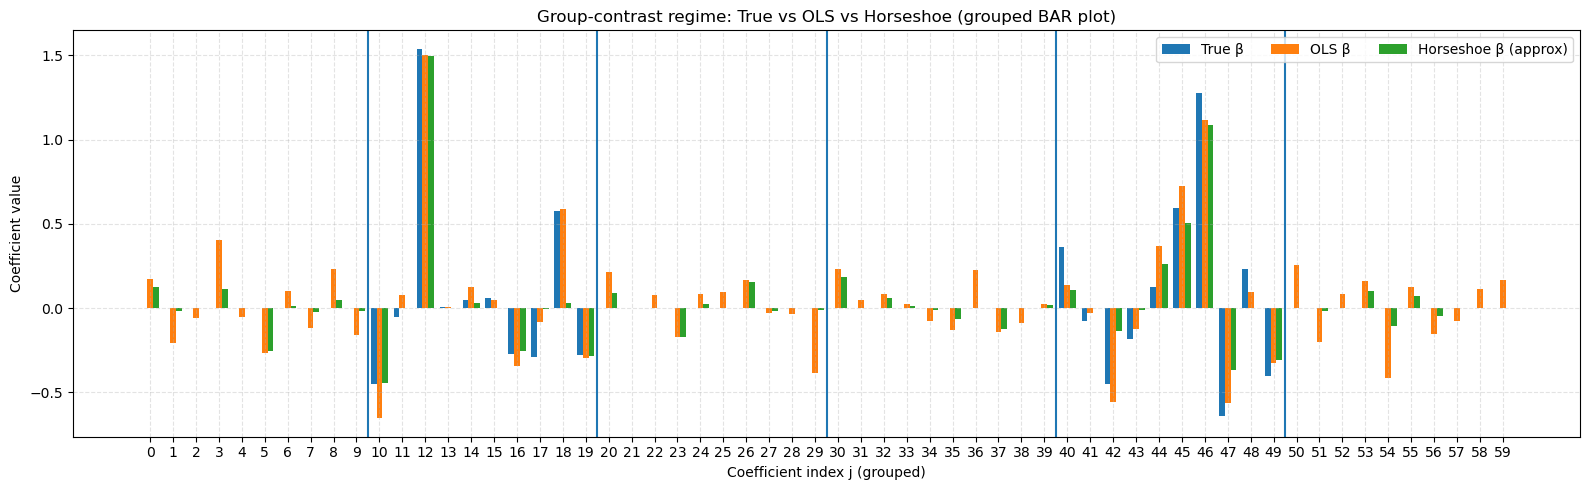

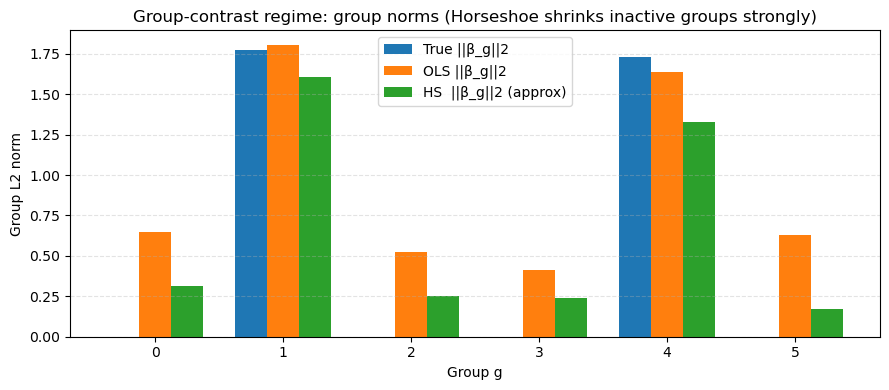

Test MSE (for reference):
  OLS       : 1.9047341009793692
  Horseshoe : 1.5343345482782254
Heuristic tau: 0.03059175072818034


In [34]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

# -----------------------------------------
# 1) Group-contrast data (group-sparse truth)
# -----------------------------------------
n_train, n_test = 160, 400
G, group_size = 6, 10
p = G * group_size
groups = [np.arange(g*group_size, (g+1)*group_size) for g in range(G)]

corr = 0.7
noise = 1.0

def makeX(n):
    Z = np.random.normal(size=(n, G))
    X = np.zeros((n, p))
    for g in range(G):
        X[:, groups[g]] = corr * Z[:, [g]] + np.sqrt(1 - corr**2) * np.random.normal(size=(n, group_size))
    return X

X_train = makeX(n_train)
X_test  = makeX(n_test)

# True beta: only a few groups active -> strong group contrast
beta_true = np.zeros(p)
active_groups = [1, 4]
beta_true[groups[1]] = np.random.normal(scale=0.45, size=group_size)
beta_true[groups[4]] = np.random.normal(scale=0.45, size=group_size)
beta_true[groups[1][2]] += 0.8
beta_true[groups[4][7]] -= 0.8

y_train = X_train @ beta_true + np.random.normal(scale=noise, size=n_train)
y_test  = X_test  @ beta_true + np.random.normal(scale=noise, size=n_test)

# Standardize X by training stats; center y
mu = X_train.mean(axis=0)
sd = X_train.std(axis=0) + 1e-12
Xtr = (X_train - mu) / sd
Xte = (X_test  - mu) / sd

y_mean = y_train.mean()
ytr = y_train - y_mean
yte = y_test  - y_mean

# -----------------------------------------
# 2) OLS baseline
# -----------------------------------------
beta_ols, *_ = np.linalg.lstsq(Xtr, ytr, rcond=None)
resid = ytr - Xtr @ beta_ols
sigma2_hat = np.mean(resid**2)

# -----------------------------------------
# 3) Horseshoe (fast deterministic approximation)
#    We compute shrinkage factors kappa_j and form beta_hs = (1-kappa_j)*beta_ols.
#
#    NOTE: This is an approximation to the posterior mean behavior,
#    intended for visualization and intuition (not full MCMC inference).
# -----------------------------------------
# A common default for global scale uses an expected sparsity level p0
p0 = group_size * len(active_groups)  # expected "effective" nonzeros (roughly)
tau = (p0 / (p - p0)) * np.sqrt(sigma2_hat / n_train)  # heuristic (Piironen & Vehtari-style)

# Local scales: half-Cauchy. For visualization we sample and temper them by |beta_ols|
lam = np.abs(np.random.standard_cauchy(size=p))
lam = np.clip(lam, 1e-3, 50)

# Make lambda more likely large where OLS is large (to mimic data-adaptive local shrinkage)
# (This keeps the spirit of global-local shrinkage without heavy computation.)
scale_ref = np.median(np.abs(beta_ols)) + 1e-12
lam = lam * (np.abs(beta_ols) / scale_ref + 0.2)

# For standardized X, X_j^T X_j ≈ n_train
xtx_diag = np.sum(Xtr**2, axis=0)
kappa = 1.0 / (1.0 + (tau**2) * (lam**2) * (xtx_diag / sigma2_hat))
beta_hs = (1.0 - kappa) * beta_ols

# -----------------------------------------
# 4) Visualizations (grouped)
# -----------------------------------------
idx = np.arange(p)
bar_w = 0.25

plt.figure(figsize=(16, 5))
plt.bar(idx - bar_w, beta_true, width=bar_w, label="True β")
plt.bar(idx,          beta_ols, width=bar_w, label="OLS β")
plt.bar(idx + bar_w,  beta_hs,  width=bar_w, label="Horseshoe β (approx)")

for g in range(1, G):
    plt.axvline(g * group_size - 0.5, linewidth=1.5)

plt.xlabel("Coefficient index j (grouped)")
plt.ylabel("Coefficient value")
plt.title("Group-contrast regime: True vs OLS vs Horseshoe (grouped BAR plot)")
plt.xticks(idx)
plt.legend(ncol=3)
plt.grid(True, linestyle="--", alpha=0.35)
plt.tight_layout()
plt.show()

# Group-level view: L2 norms by group
def group_norms(b):
    return np.array([np.linalg.norm(b[g], 2) for g in groups])

gn_true = group_norms(beta_true)
gn_ols  = group_norms(beta_ols)
gn_hs   = group_norms(beta_hs)

plt.figure(figsize=(9, 4))
g_idx = np.arange(G)
w = 0.25
plt.bar(g_idx - w, gn_true, width=w, label="True ||β_g||2")
plt.bar(g_idx,     gn_ols,  width=w, label="OLS ||β_g||2")
plt.bar(g_idx + w, gn_hs,   width=w, label="HS  ||β_g||2 (approx)")
plt.xlabel("Group g")
plt.ylabel("Group L2 norm")
plt.title("Group-contrast regime: group norms (Horseshoe shrinks inactive groups strongly)")
plt.xticks(g_idx)
plt.legend()
plt.grid(True, axis="y", linestyle="--", alpha=0.35)
plt.tight_layout()
plt.show()

# Test MSE for reference
def mse(y, yhat):
    return np.mean((y - yhat)**2)

print("Test MSE (for reference):")
print("  OLS       :", mse(yte, Xte @ beta_ols))
print("  Horseshoe :", mse(yte, Xte @ beta_hs))
print("Heuristic tau:", tau)


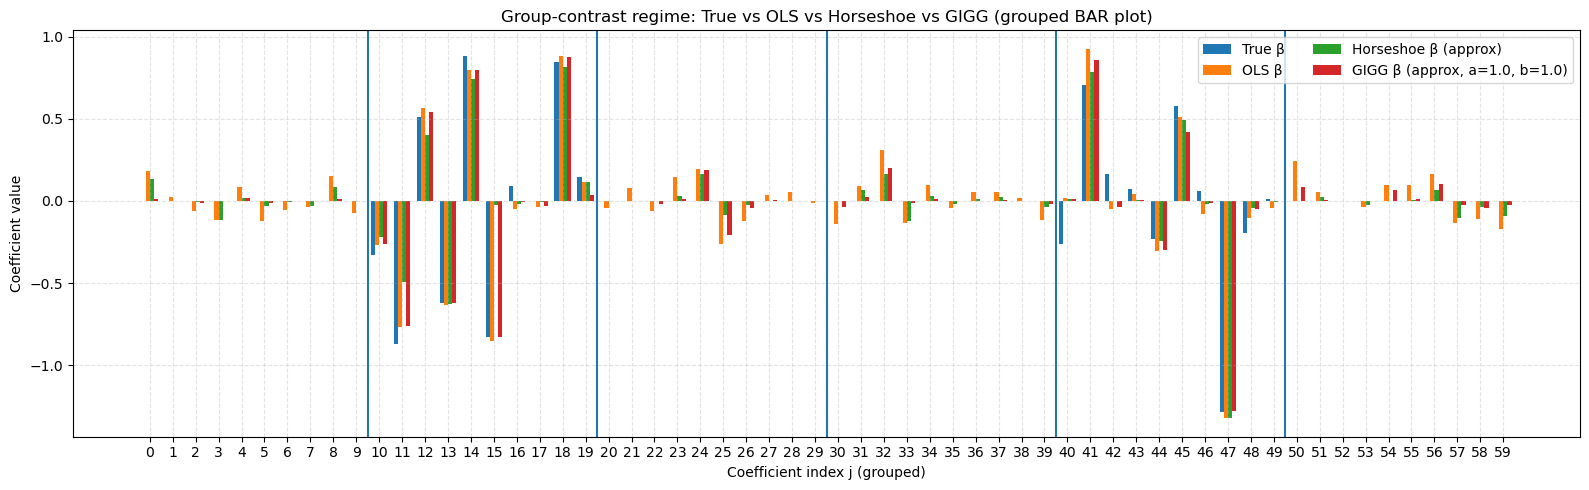

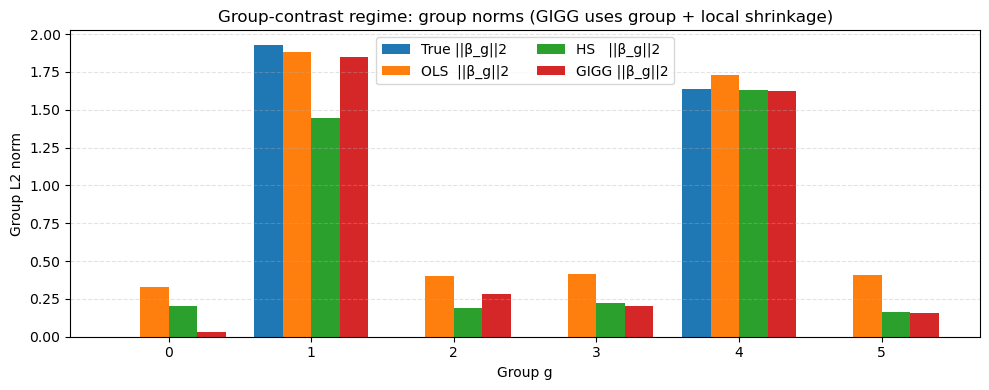

Test MSE (for reference):
  OLS       : 1.6716749011889005
  Horseshoe : 2.1094931904129957
  GIGG      : 1.311784453496912
Heuristic tau (HS/GIGG): 0.03229176468371712
Gamma2 (group scales): [0.093 3.539 0.56  0.495 0.988 0.435]


In [35]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2026)

# -----------------------------------------
# 1) Group-contrast regression data
# -----------------------------------------
n_train, n_test = 160, 400
G, group_size = 6, 10
p = G * group_size
groups = [np.arange(g*group_size, (g+1)*group_size) for g in range(G)]

corr = 0.7
noise = 1.0

def makeX(n):
    Z = np.random.normal(size=(n, G))
    X = np.zeros((n, p))
    for g in range(G):
        X[:, groups[g]] = corr * Z[:, [g]] + np.sqrt(1 - corr**2) * np.random.normal(size=(n, group_size))
    return X

X_train = makeX(n_train)
X_test  = makeX(n_test)

# True beta: only a few groups active -> strong group contrast
beta_true = np.zeros(p)
active_groups = [1, 4]
beta_true[groups[1]] = np.random.normal(scale=0.45, size=group_size)
beta_true[groups[4]] = np.random.normal(scale=0.45, size=group_size)
beta_true[groups[1][2]] += 0.8
beta_true[groups[4][7]] -= 0.8

y_train = X_train @ beta_true + np.random.normal(scale=noise, size=n_train)
y_test  = X_test  @ beta_true + np.random.normal(scale=noise, size=n_test)

# Standardize X by training stats; center y
mu = X_train.mean(axis=0)
sd = X_train.std(axis=0) + 1e-12
Xtr = (X_train - mu) / sd
Xte = (X_test  - mu) / sd

y_mean = y_train.mean()
ytr = y_train - y_mean
yte = y_test  - y_mean

# -----------------------------------------
# 2) OLS baseline and noise estimate
# -----------------------------------------
beta_ols, *_ = np.linalg.lstsq(Xtr, ytr, rcond=None)
resid = ytr - Xtr @ beta_ols
sigma2_hat = np.mean(resid**2)

xtx_diag = np.sum(Xtr**2, axis=0)  # ~ n_train for standardized columns

# -----------------------------------------
# 3) Horseshoe (same fast approximation as before, for context)
# -----------------------------------------
p0 = group_size * len(active_groups)  # rough expected effective nonzeros
tau_hs = (p0 / (p - p0)) * np.sqrt(sigma2_hat / n_train)  # heuristic

lam_hs = np.abs(np.random.standard_cauchy(size=p))
lam_hs = np.clip(lam_hs, 1e-3, 50)
scale_ref = np.median(np.abs(beta_ols)) + 1e-12
lam_hs = lam_hs * (np.abs(beta_ols) / scale_ref + 0.2)

kappa_hs = 1.0 / (1.0 + (tau_hs**2) * (lam_hs**2) * (xtx_diag / sigma2_hat))
beta_hs = (1.0 - kappa_hs) * beta_ols

# -----------------------------------------
# 4) GIGG prior shrinkage (fast approximation)
#    Hierarchy (one common parameterization in literature):
#      beta_gj | tau, gamma_g, lambda_gj ~ N(0, tau^2 * gamma_g^2 * lambda_gj^2)
#      gamma_g^2 ~ Gamma(a, 1)      (group scale)
#      lambda_gj^2 ~ InvGamma(b, 1) (local scale)
#
#    We approximate posterior mean behavior with:
#      kappa_gj = 1 / (1 + tau^2*gamma_g^2*lambda_gj^2 * (x_j^T x_j)/sigma^2 )
#      beta_gj_hat ≈ (1 - kappa_gj) * beta_ols_j
# -----------------------------------------
def sample_invgamma(shape, scale, size):
    # If X ~ Gamma(shape, rate=1/scale) then 1/X ~ InvGamma(shape, scale)
    return 1.0 / np.random.gamma(shape=shape, scale=1.0/scale, size=size)

# Hyperparameters (tunable): larger a -> heavier group tails; larger b -> more shrinkage locally
a = 1.0   # group Gamma shape
b = 1.0   # local InvGamma shape

# Global scale tau for GIGG: use same sparsity heuristic to be comparable
tau_gigg = tau_hs

# Sample group scales gamma_g^2 and local scales lambda_gj^2
gamma2 = np.random.gamma(shape=a, scale=1.0, size=G)  # Gamma(a,1)
lambda2 = sample_invgamma(shape=b, scale=1.0, size=p)  # InvGamma(b,1)

# Optionally make local scales weakly data-adaptive (helps visualization stability)
lambda2 = lambda2 * ( (np.abs(beta_ols)/scale_ref + 0.2) ** 2 )

# Build per-coefficient shrinkage factor using group membership
gamma2_per_j = np.zeros(p)
for g in range(G):
    gamma2_per_j[groups[g]] = gamma2[g]

kappa_gigg = 1.0 / (1.0 + (tau_gigg**2) * gamma2_per_j * lambda2 * (xtx_diag / sigma2_hat))
beta_gigg = (1.0 - kappa_gigg) * beta_ols

# -----------------------------------------
# 5) Visualizations: grouped coefficient BAR plot
# -----------------------------------------
idx = np.arange(p)
bar_w = 0.18

plt.figure(figsize=(16, 5))
plt.bar(idx - 1.5*bar_w, beta_true, width=bar_w, label="True β")
plt.bar(idx - 0.5*bar_w, beta_ols,  width=bar_w, label="OLS β")
plt.bar(idx + 0.5*bar_w, beta_hs,   width=bar_w, label="Horseshoe β (approx)")
plt.bar(idx + 1.5*bar_w, beta_gigg, width=bar_w, label=f"GIGG β (approx, a={a}, b={b})")

for g in range(1, G):
    plt.axvline(g * group_size - 0.5, linewidth=1.5)

plt.xlabel("Coefficient index j (grouped)")
plt.ylabel("Coefficient value")
plt.title("Group-contrast regime: True vs OLS vs Horseshoe vs GIGG (grouped BAR plot)")
plt.xticks(idx)
plt.legend(ncol=2)
plt.grid(True, linestyle="--", alpha=0.35)
plt.tight_layout()
plt.show()

# -----------------------------------------
# 6) Group norms plot (shows group-level behavior)
# -----------------------------------------
def group_norms(b):
    return np.array([np.linalg.norm(b[g], 2) for g in groups])

gn_true = group_norms(beta_true)
gn_ols  = group_norms(beta_ols)
gn_hs   = group_norms(beta_hs)
gn_gigg = group_norms(beta_gigg)

plt.figure(figsize=(10, 4))
g_idx = np.arange(G)
w = 0.2
plt.bar(g_idx - 1.5*w, gn_true, width=w, label="True ||β_g||2")
plt.bar(g_idx - 0.5*w, gn_ols,  width=w, label="OLS  ||β_g||2")
plt.bar(g_idx + 0.5*w, gn_hs,   width=w, label="HS   ||β_g||2")
plt.bar(g_idx + 1.5*w, gn_gigg, width=w, label="GIGG ||β_g||2")
plt.xlabel("Group g")
plt.ylabel("Group L2 norm")
plt.title("Group-contrast regime: group norms (GIGG uses group + local shrinkage)")
plt.xticks(g_idx)
plt.legend(ncol=2)
plt.grid(True, axis="y", linestyle="--", alpha=0.35)
plt.tight_layout()
plt.show()

# -----------------------------------------
# 7) Test MSE reference
# -----------------------------------------
def mse(y, yhat):
    return np.mean((y - yhat)**2)

print("Test MSE (for reference):")
print("  OLS       :", mse(yte, Xte @ beta_ols))
print("  Horseshoe :", mse(yte, Xte @ beta_hs))
print("  GIGG      :", mse(yte, Xte @ beta_gigg))
print("Heuristic tau (HS/GIGG):", tau_hs)
print("Gamma2 (group scales):", np.round(gamma2, 3))
